 ## UK Road Safety: Traffic Accidents and Vehicles Visualizations and Solution
 
 The goal of this project is the investigate what causes Serious and Fatal accidents in hopes of preventing and decreasing the number of them. The dataset consists of accident records from the UK over the course of 15+ years. I hope to show the causes of these accidents through visualizations and create an algorithm that can predict the severity of accidents. 
 
The UK government collects and publishes (usually on an annual basis) detailed information about traffic accidents across the country. This information includes, but is not limited to, geographical locations, weather conditions, type of vehicles, number of casualties and vehicle manoeuvres, making this a very interesting and comprehensive dataset for analysis and research.

The data that I'm using is compiled and available through [Kaggle](https://www.kaggle.com/tsiaras/uk-road-safety-accidents-and-vehicles) and in a less compliled form, [here](https://beta.ukdataservice.ac.uk/datacatalogue/series/series?id=2000045). 

Genesis L. Taylor<br>
[Github](https://github.com/GenTaylor/) | [Linkedin](https://linkedin.com/in/genesistaylor/) | [Tableau](https://public.tableau.com/profile/genesis.taylor#!/) | [genesisltaylor@gmail.com](mailto:genesisltaylor@gmail.com)


Problem: Traffic Accidents<br>
Solution Method: Use data to figure out how to lower the number of accidents and the severity of them.

### Table of Contents
* [General Visualizations](#General-Visualizations)<br>
    * [Accident Forecasting with Tableau](#Accident-Forecasting-with-Tableau)<br>
* [Correlations](#Correlations)<br>
    * [Chi-Squared Test](#Chi-Squared-Test)
* [Visualizations In Relation to Accident Seriousness](#Visualizations-In-Relation-to-Accident-Seriousness)<br>
    * [Visualization Summary](#Visualization-Summary)
* [Other Visualizations](#Other-Visualizations)<br>
    * [Other Visualizations Summary](#Other-Visualizations-Summary)<br>
* [Solution](#Solution)<br>
    * [Web Scraping](#Web-Scraping)<br>
    * [Mapping of Problem Areas](#Mapping-of-Problem-Areas)<br>

### Links to Other Notebooks And Presentation
__[UK Road Safety: Traffic Accidents and Vehicles Introduction, Data Cleaning, and Feature Manipulation](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Data_Cleaning_and_Feature_Manipulation.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Introduction, Data Cleaning, and Feature Manipulation: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Data_Cleaning_and_Feature_Manipulation.ipynb)__<br>
<br>

__[UK Road Safety: Traffic Accidents and Vehicles Visualizations and Solution](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Visualizations_and_Solution.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Visualizations and Solution: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Visualizations_and_Solution.ipynb)__<br>
<br>
__[UK Road Safety: Traffic Accidents and Vehicles Machine Learning](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Machine_Learning.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Machine Learning: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Machine_Learning.ipynb)__<br>
<br>
__[Traffic Analysis and Severity Prediction Powerpoint Presentation]("Traffic_Analysis_and_Severity_Prediction.pptx")__<br>
__[Traffic Analysis and Severity Prediction Powerpoint Presentation: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/Traffic_Analysis_and_Severity_Prediction.pptx)__<br>

### Importing and Data Merging

In [1]:
#Import modules
import numpy as np
import holidays
import pandas as pd
import seaborn as sns
import pickle
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

#for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

#other learners
from xgboost import XGBClassifier
import lightgbm as lgb
from kmodes.kmodes import KModes

#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

#webscraping
import requests
from bs4 import BeautifulSoup
import re
import urllib
from IPython.core.display import HTML

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


#warning ignorer
import warnings
warnings.filterwarnings("ignore")

In [2]:
# # #DATAFRAME PICKLE CREATED IN CELLS BELOW INSTEAD OF RUNNING THROUGH ENTIRE PROCESS AFTER RESTARTING
# # #import pickled file
df = pd.read_pickle("df.pkl")
# df.to_csv('uktraffic_acc.csv') 

### General Visualizations

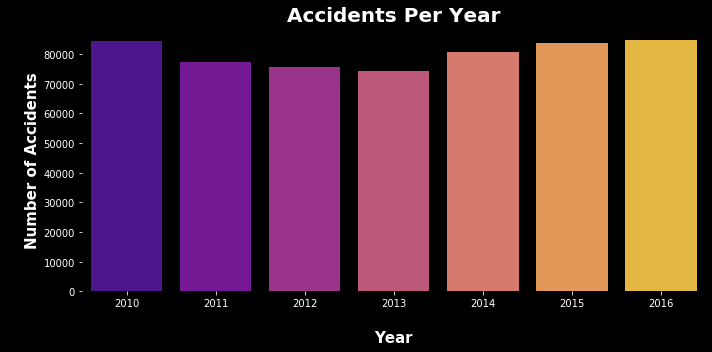

In [3]:
accidentsperyear = df.groupby(['year'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(accidentsperyear.index,accidentsperyear.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Year",fontsize=20,fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentsperyear.png')
plt.tight_layout()


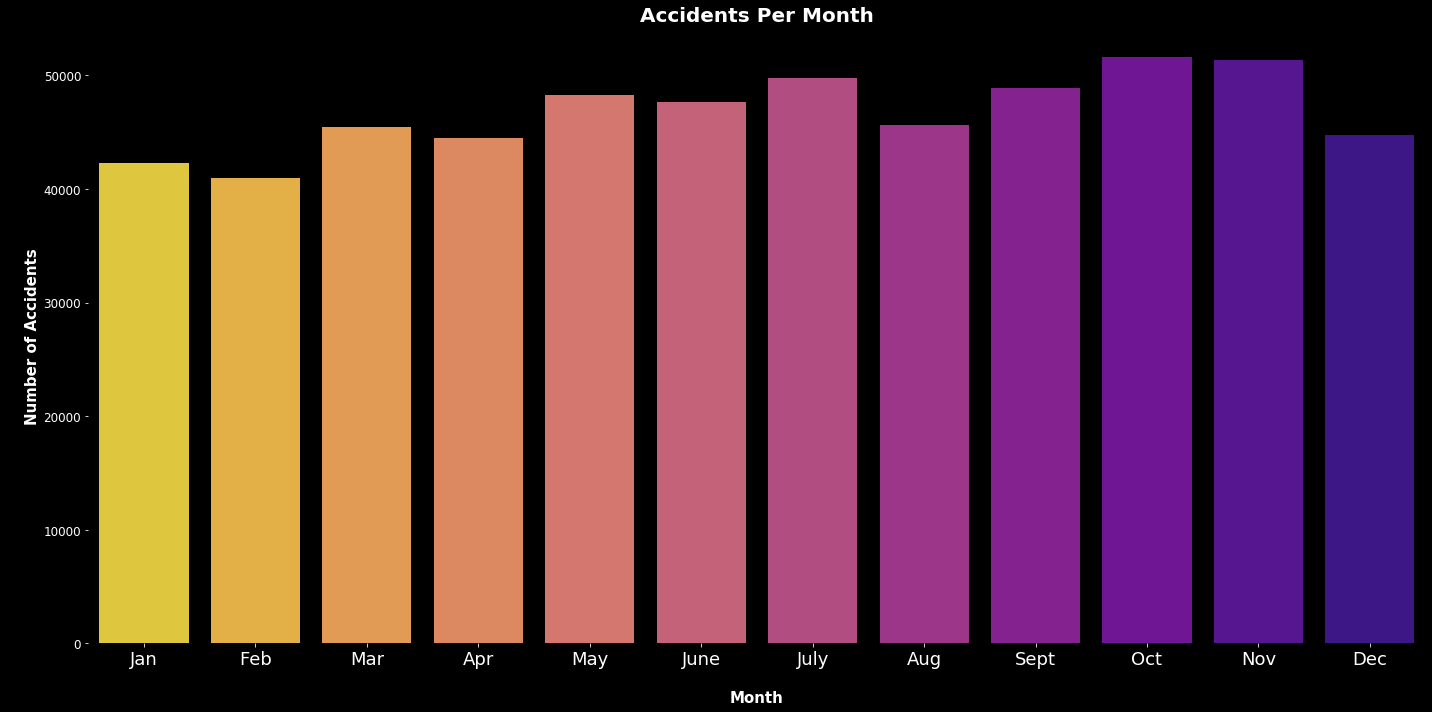

In [4]:
accidentspermonth = df.groupby(['month'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
colors = sns.color_palette("plasma_r", n_colors=12)
mt=sns.barplot(accidentspermonth.index,accidentspermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
#ax is the axes instance
group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]

mt.set_xticklabels(group_labels)
plt.title("Accidents Per Month",fontsize=20,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.xlabel("\nMonth", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentspermonth.png')
plt.tight_layout()


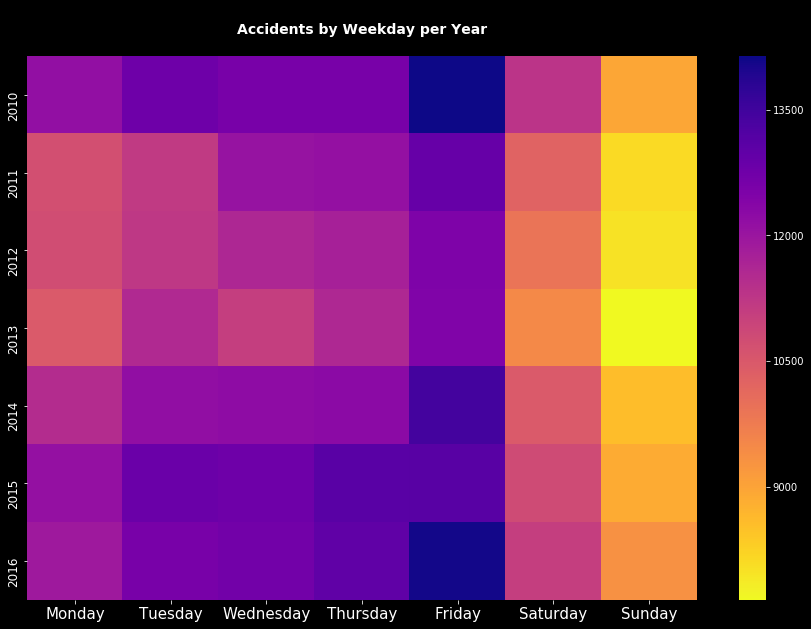

In [5]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accweekday = df.groupby(['year', 'day_of_week']).size()
accweekday = accweekday.rename_axis(['year', 'day_of_week'])\
                               .unstack('day_of_week')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nAccidents by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('accidentsbyweekdayperyear.png')
plt.show()

Fridays are the day of the week where the most accidents occur.

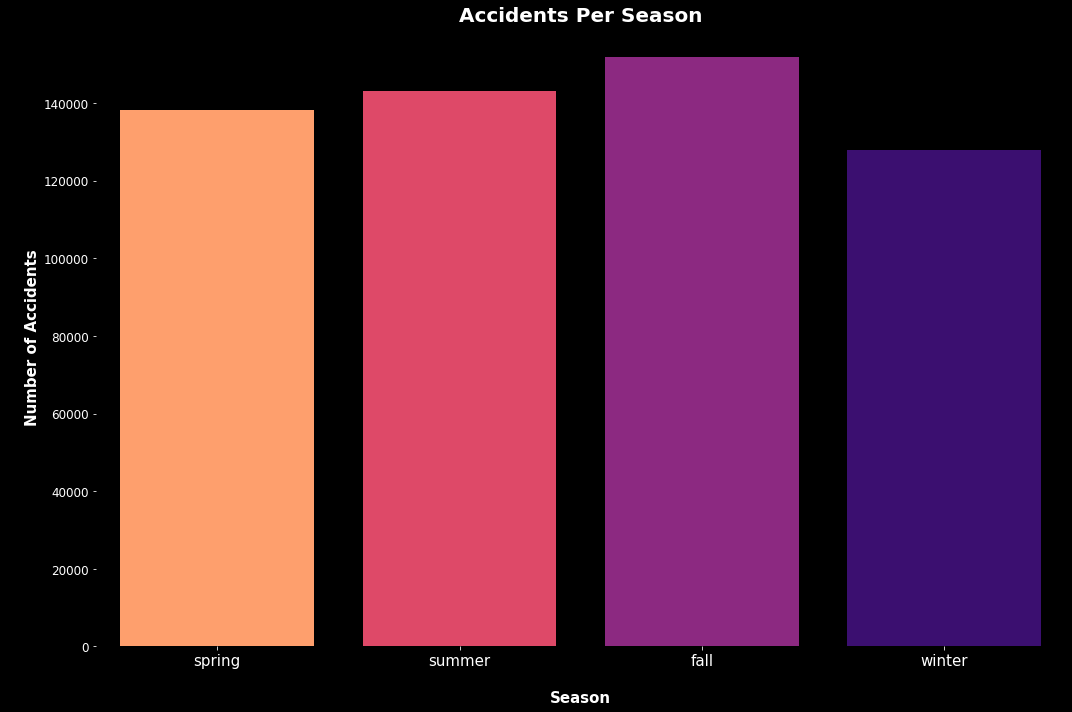

In [6]:
accidentsperseason = df.groupby(['season'])['accident_index'].count()
seaord=['spring', 'summer', 'fall','winter']
# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(accidentsperseason.index,accidentsperseason.values, order=seaord, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nSeason", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentsperseason.png')


In [7]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"After Work Rush (16-18)", "Evening (18-22)", "Night (22-6)"

timeofdaygroups = {'1': "Morning Rush",
                   '2': "Day",
                   '3': "Lunch Rush",
                   '4': "Afternoon",
                   '5': "After Work Rush",
                   '6': "Evening",
                   '7': "Night"}
df['time_of_day']=df['time_of_day'].map(timeofdaygroups)

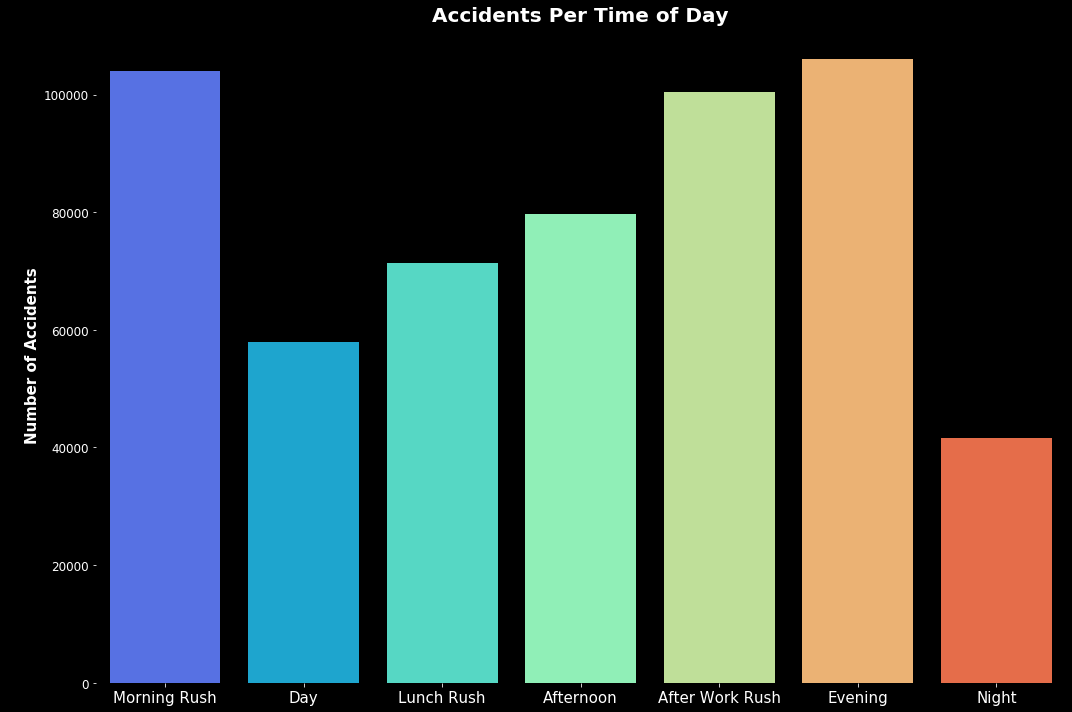

In [8]:
accidentspertod = df.groupby(['time_of_day'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
tod=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "After Work Rush", "Evening", "Night"]
sns.barplot(accidentspertod.index,accidentspertod.values, order=tod, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentspertod.png')


### Accident Forecasting with Tableau

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1572176706313' style='position: relative'><noscript><a href='https:&#47;&#47;github.com&#47;GenTaylor&#47;Traffic-Accident-Analysis'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ac&#47;AccidentForecasting&#47;AccidentForecasting&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AccidentForecasting&#47;AccidentForecasting' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ac&#47;AccidentForecasting&#47;AccidentForecasting&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1572176706313');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

According to the forcasting above, traffic accidents will be slightly lower than years before but following similar trends throughout the months. 

### Correlations
For correlation I used both Pearson and Spearman just in case there would be discrepancies. The order may have slightly varied but the "highest" correlated remained the same.

In [10]:
#correlation by accident severity pearson
corrdf=df.apply(LabelEncoder().fit_transform)
sc = StandardScaler()
corrdf = sc.fit_transform(corrdf)
corrdf=pd.DataFrame(data=corrdf,columns=df.columns)
corr=corrdf.corr()['accident_seriousness']
corr[np.argsort(corr,axis=0)[::-1]]

accident_seriousness                           1.000000
vehicle_type                                   0.133941
x1st_point_of_impact                           0.076099
speed_limit                                    0.065554
skidding_and_overturning                       0.059322
vehicle_leaving_carriageway                    0.058977
sex_of_driver                                  0.054505
lsoa_of_accident_location                      0.048548
number_of_casualties                           0.043294
age_band_of_driver                             0.039851
junction_control                               0.037966
hit_object_off_carriageway                     0.036040
model                                          0.022808
accident_index                                 0.022391
junction_location                              0.019548
road_type                                      0.019443
engine_capacity_cc_size                        0.019305
driver_imd_decile                              0

In [11]:
corr_spear=corrdf.corr(method='spearman')['accident_seriousness']
corr_spear[np.argsort(corr_spear,axis=0)[::-1]]

accident_seriousness                           1.000000
vehicle_type                                   0.114374
vehicle_leaving_carriageway                    0.071079
x1st_point_of_impact                           0.067697
speed_limit                                    0.062779
skidding_and_overturning                       0.059746
sex_of_driver                                  0.054629
lsoa_of_accident_location                      0.048538
junction_control                               0.041690
age_band_of_driver                             0.037758
hit_object_off_carriageway                     0.034738
road_type                                      0.028215
junction_location                              0.024224
junction_detail                                0.024051
accident_index                                 0.022667
number_of_casualties                           0.022535
engine_capacity_cc_size                        0.022157
model                                          0

Looking at this I wanted to visualize some of the higher pos/negative correlations against accident severity.

#### Chi-Squared Test

Before these visualizations were done, I wanted to be sure that the visualizations were of some importance to accident_seriousness. For this, the chi-squared test was used.

In [12]:
"""chisquare algorithm from 
http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python """

    
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="The column {0} is IMPORTANT for Prediction".format(colX)
        else:
            result="The column {0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, 
                                       index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
testColumns = ['accident_index', '1st_road_class', '1st_road_number','2nd_road_number', 
               'carriageway_hazards', 'date', 'day_of_week', 
               'did_police_officer_attend_scene_of_accident','junction_control', 
               'junction_detail', 'latitude', 'light_conditions', 'local_authority_district',
               'local_authority_highway', 'longitude','lsoa_of_accident_location', 
               'number_of_casualties', 'number_of_vehicles', 'pedestrian_crossing-human_control',
               'pedestrian_crossing-physical_facilities', 'police_force','road_surface_conditions', 
               'road_type', 'special_conditions_at_site', 'speed_limit', 'time', 
               'urban_or_rural_area', 'weather_conditions', 'year', 'inscotland', 
               'age_band_of_driver', 'age_of_vehicle', 'driver_home_area_type', 
               'driver_imd_decile', 'engine_capacity_cc','hit_object_in_carriageway', 
               'hit_object_off_carriageway', 'journey_purpose_of_driver', 'junction_location', 
               'make', 'model','propulsion_code', 'sex_of_driver', 'skidding_and_overturning',
               'towing_and_articulation', 'vehicle_leaving_carriageway',
               'vehicle_locationrestricted_lane', 'vehicle_manoeuvre','vehicle_reference',
               'vehicle_type', 'was_vehicle_left_hand_drive', 'x1st_point_of_impact', 'month',
               'weekend', 'hour', 'time_of_day','season', 'engine_capacity_cc_size']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="accident_seriousness" )  

The column accident_index is IMPORTANT for Prediction
The column 1st_road_class is IMPORTANT for Prediction
The column 1st_road_number is IMPORTANT for Prediction
The column 2nd_road_number is IMPORTANT for Prediction
The column carriageway_hazards is IMPORTANT for Prediction
The column date is IMPORTANT for Prediction
The column day_of_week is IMPORTANT for Prediction
The column did_police_officer_attend_scene_of_accident is IMPORTANT for Prediction
The column junction_control is IMPORTANT for Prediction
The column junction_detail is IMPORTANT for Prediction
The column latitude is IMPORTANT for Prediction
The column light_conditions is IMPORTANT for Prediction
The column local_authority_district is IMPORTANT for Prediction
The column local_authority_highway is IMPORTANT for Prediction
The column longitude is IMPORTANT for Prediction
The column lsoa_of_accident_location is IMPORTANT for Prediction
The column number_of_casualties is IMPORTANT for Prediction
The column number_of_vehicles

## Visualizations In Relation to Accident Seriousness

#### Method:
For my visualizations I have decided to use some of the features with the highest correlations to accident_seriousness:
* did_police_officer_attend_scene_of_accident 
* x1st_point_of_impact 
* number_of_vehicles  
* speed_limit
* urban_or_rural_area  
* skidding_and_overturning 
* vehicle_leaving_carriageway 
* sex_of_driver     
* vehicle_type  
* vehicle_manoeuvre 
* engine_capacity_cc 
* number_of_casualties                           
* driver_home_area_type  
* age_band_of_driver  
* junction_control  
* hit_object_off_carriageway
* hit_object_in_carriageway 
* driver_imd_decile *
* junction_detail *
* junction_location *
* propulsion_code *
* year *
***
Note: The columns used were selected because of the absolute value of their correlation in relation to accident_seriousness

*columns added after correlation was done after undersampling

For visual reasons, two separate dataframes were created, for not serious and serious accidents. I wanted to better scale the data and for me, this was the simplest way of doing so.

In [13]:
#dataframe where accidents are Slight
not_serious = df[(df['accident_seriousness']=="Not Serious")]
print("Not Serious Group Shape:", not_serious.shape)

not_serious.accident_seriousness.value_counts()

Not Serious Group Shape: (492804, 60)


Not Serious    492804
Name: accident_seriousness, dtype: int64

In [14]:
#dataframe where accidents are serious
serious= df[(df['accident_seriousness']=="Serious")]

print("Serious Group Shape:", serious.shape)
serious.accident_seriousness.value_counts()

Serious Group Shape: (68331, 60)


Serious    68331
Name: accident_seriousness, dtype: int64

In [15]:
#map 1, 2, 3 in did_police_officer_attend_scene_of_accident with Yes, No,Self-reported
policeattend = {1: "Yes", 2:"No", 3:"Self-Reported"}
not_serious['did_police_officer_attend_scene_of_accident']=not_serious['did_police_officer_attend_scene_of_accident'].map(policeattend)
df['did_police_officer_attend_scene_of_accident']=df['did_police_officer_attend_scene_of_accident'].map(policeattend)
serious['did_police_officer_attend_scene_of_accident']=serious['did_police_officer_attend_scene_of_accident'].map(policeattend)


In [16]:
imddecile = {1:"Most deprived 10%", 2:"More deprived 10-20%", 3:"More deprived 20-30%", 
             4:"More deprived 30-40%", 5:"More deprived 40-50%", 6:"Less deprived 40-50%", 
             7:"Less deprived 30-40%", 8:"Less deprived 20-30%", 9:"Less deprived 10-20%", 
             10:"Least deprived 10%"}

not_serious['driver_imd_decile']=not_serious['driver_imd_decile'].map(imddecile)
df['driver_imd_decile']=df['driver_imd_decile'].map(imddecile)
serious['driver_imd_decile']=serious['driver_imd_decile'].map(imddecile)


In [17]:
#setups for adding frequencies to visualizations
dftotal= float(len(df))
nstotal= float(len(not_serious))
setotal= float(len(serious))


#### Did Police Officer Attend Scene Of Accident

The below plots will look into if police officers attended the scene of an accident. 

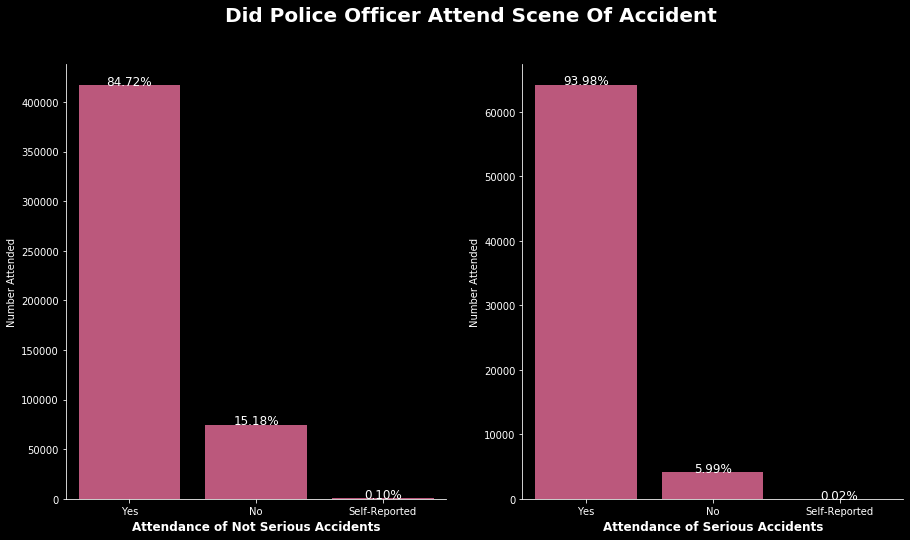

In [18]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 = sns.countplot( "did_police_officer_attend_scene_of_accident", hue="accident_seriousness", 
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("did_police_officer_attend_scene_of_accident", hue="accident_seriousness",  
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Did Police Officer Attend Scene Of Accident", fontsize=20, fontweight="bold")
ax1.set_xlabel('Attendance of Not Serious Accidents', fontsize=12, fontweight="bold")
ax2.set_xlabel('Attendance of Serious Accidents', fontsize=12, fontweight="bold")
ax1.set_ylabel('Number Attended')
ax2.set_ylabel('Number Attended')
ax1.get_legend().remove()
ax2.get_legend().remove()
plt.savefig('did_police_officer_attend_scene_of_accident.png')
fig.show()


#### First Point of Impact

The below plots show the counts for the first spot in which vehicles were hit in an accident

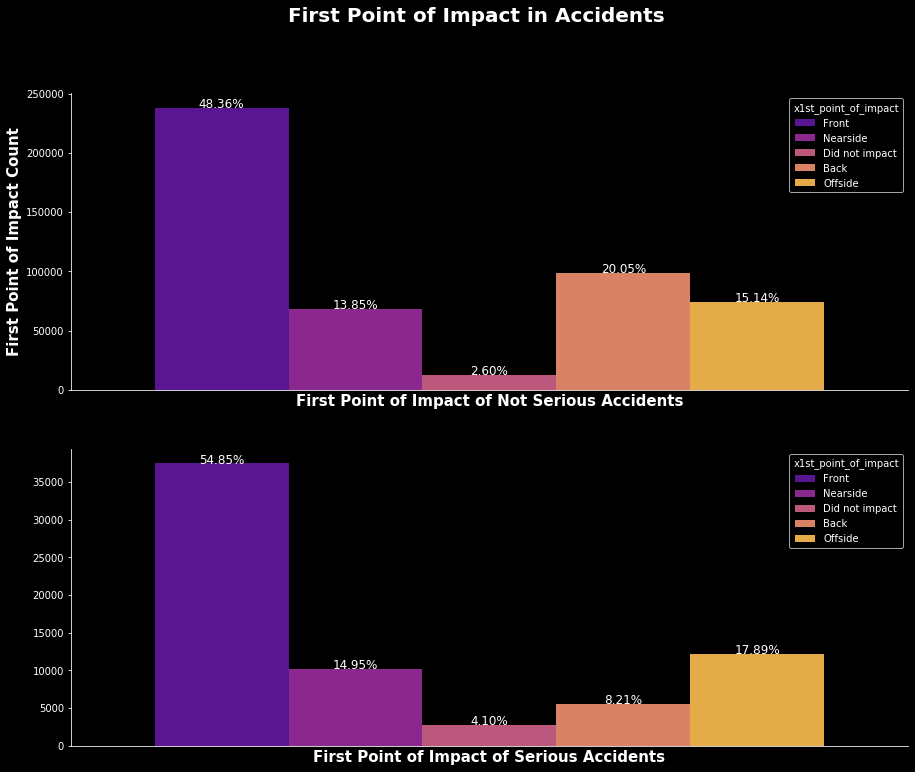

In [19]:
# First Point of Impact Vs Accident Seriousness (Not Serious)
fpoa_order =["Front", "Nearside", "Did not impact", "Back", "Offside"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness",hue="x1st_point_of_impact", hue_order=fpoa_order,  
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness",hue="x1st_point_of_impact", hue_order=fpoa_order, 
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("First Point of Impact in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('First Point of Impact of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('First Point of Impact of Serious Accidents',  fontsize=15, fontweight="bold")
ax1.set_ylabel('First Point of Impact Count', fontsize=15, fontweight="bold")
ax2.set_ylabel('')
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.savefig('x1st_point_of_impact.png')
fig.show()


#### Number of Vehicles

The below plots show the counts for number of vehicles in each accident.

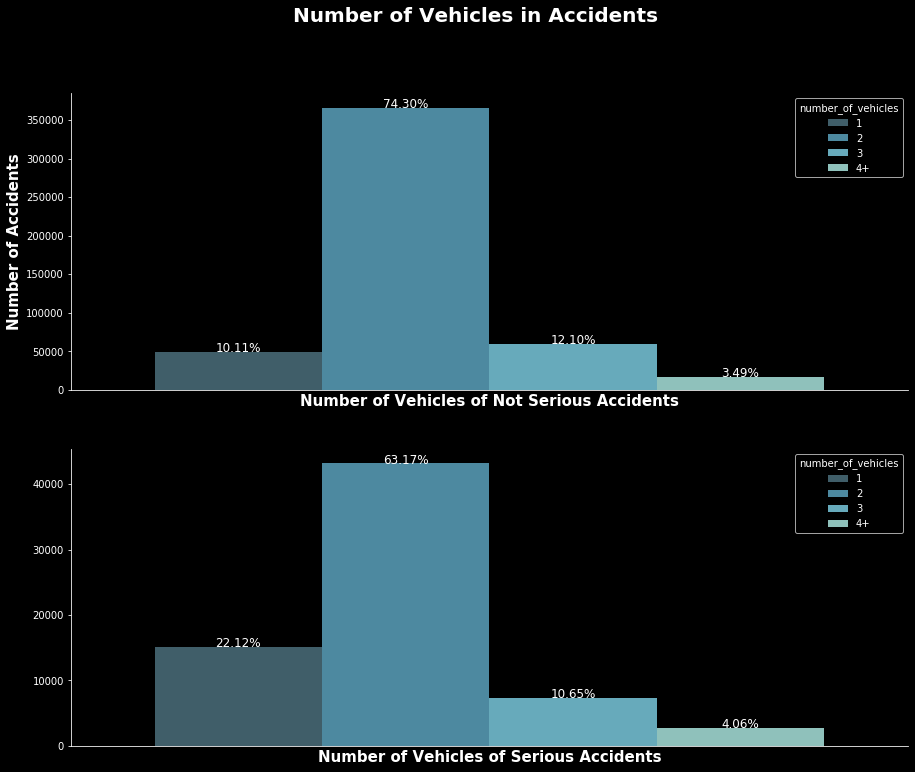

In [20]:

nov_order=["1","2", "3", "4+"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="number_of_vehicles", hue_order=nov_order,
              palette="GnBu_d", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="number_of_vehicles", hue_order=nov_order,
              palette="GnBu_d", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Number of Vehicles in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Number of Vehicles of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Number of Vehicles of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('number_of_vehicles.png')
fig.show()


#### Spe#### Speed Limit vs Accident Seriousness
The below graphs show the speed limit by accident in areas where the accidents occured. ed Limit vs Accident Seriousness

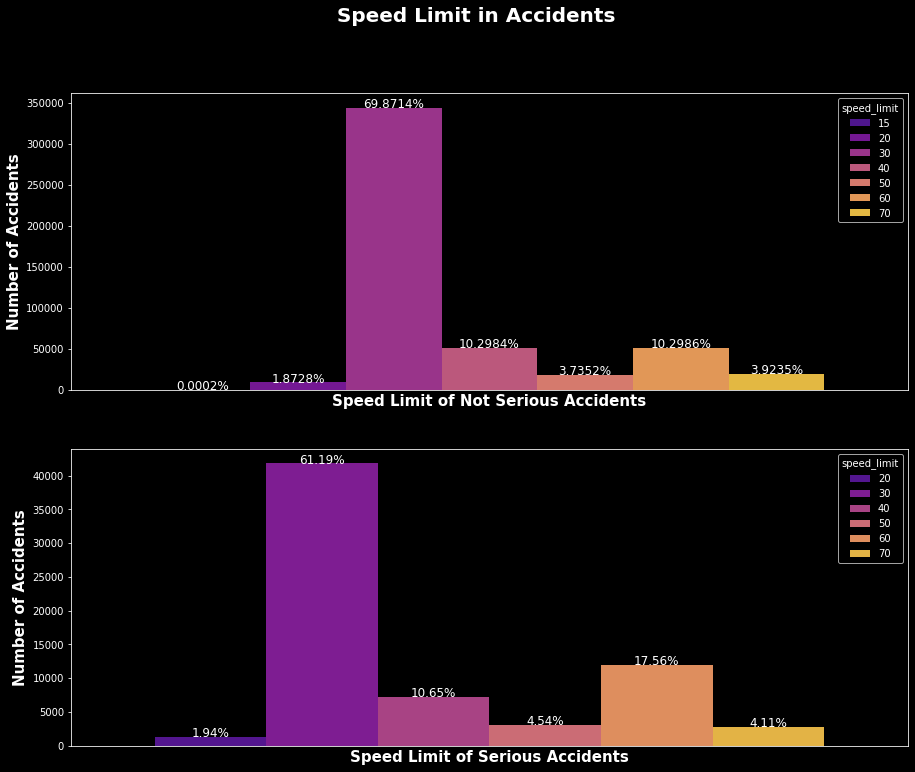

In [21]:
splt_order=[15, 20,30,40,50,60,70]
splt_order2=[20,30,40,50,60,70]
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))

ax1 =sns.countplot("accident_seriousness", hue="speed_limit", hue_order=splt_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.4f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="speed_limit", hue_order=splt_order2,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Speed Limit in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Speed Limit of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Speed Limit of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.savefig('speed_limit.png')
fig.show()


#### Urban  or Rural  Area vs Accident Seriousness
The graphs below show whether the accidents occured in an Urban or Rural Area.

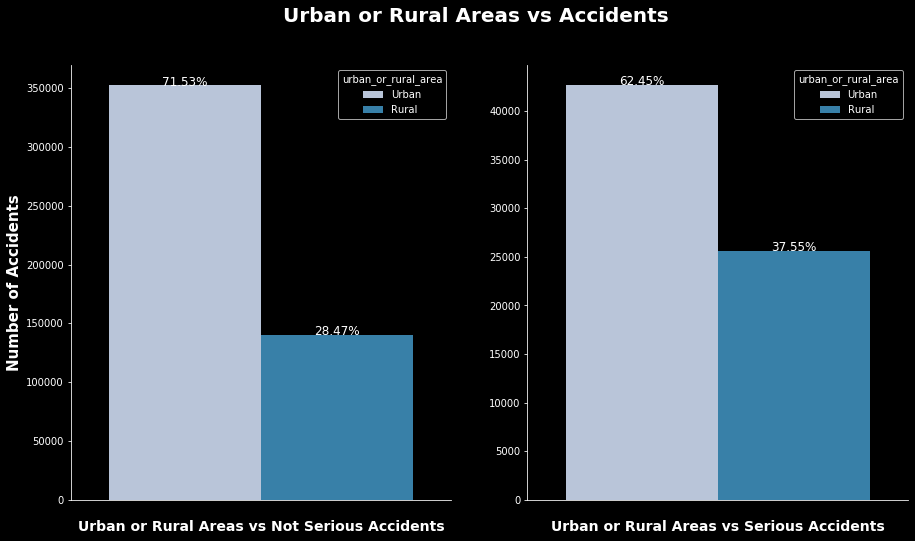

In [22]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness",  hue="urban_or_rural_area",
              palette="PuBu", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness",  hue="urban_or_rural_area",
              palette="PuBu", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Urban or Rural Areas vs Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nUrban or Rural Areas vs Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nUrban or Rural Areas vs Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('urban_or_rural_area.png')
fig.show()


#### Skidding and Overturning vs Seriousness
The below graphs show if any skidding, jackniffing, and/or overturnning occured in the acccident.

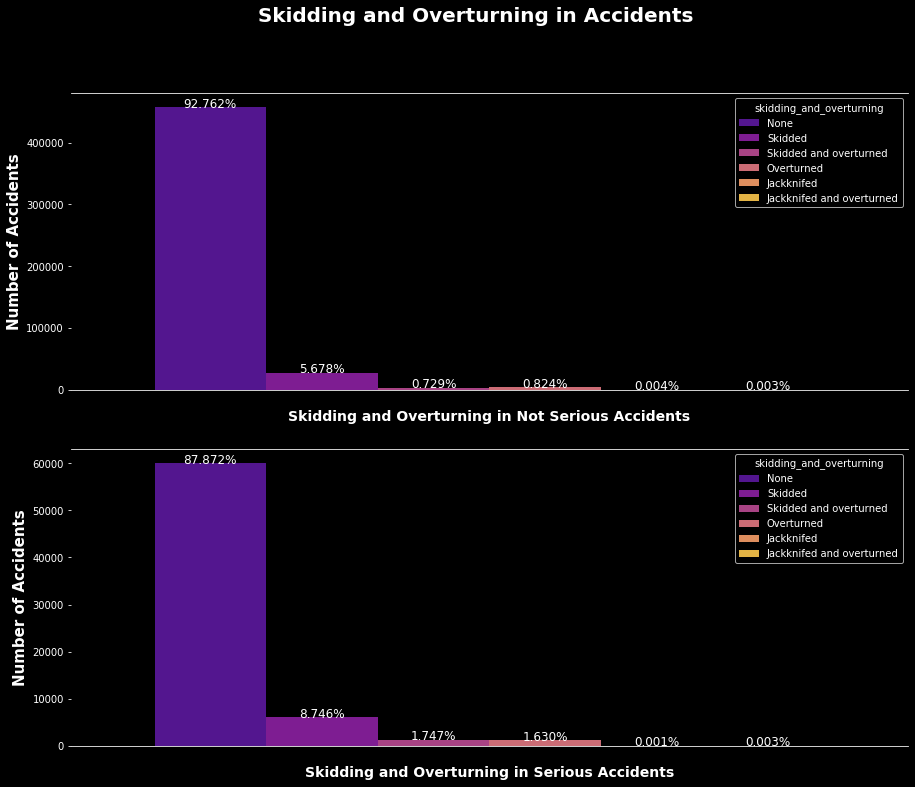

In [23]:
sao_order=["None", "Skidded", "Skidded and overturned", "Overturned", "Jackknifed", 
           "Jackknifed and overturned"]
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="skidding_and_overturning", hue_order=sao_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="skidding_and_overturning", hue_order=sao_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Skidding and Overturning in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nSkidding and Overturning in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nSkidding and Overturning in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.savefig('skidding_and_overturning.png')
fig.show()


#### Vehicle Leaving Carriageway vs Seriousness
The below graphs show if a vehicle left the carriageway, and if they did, where did they do so.

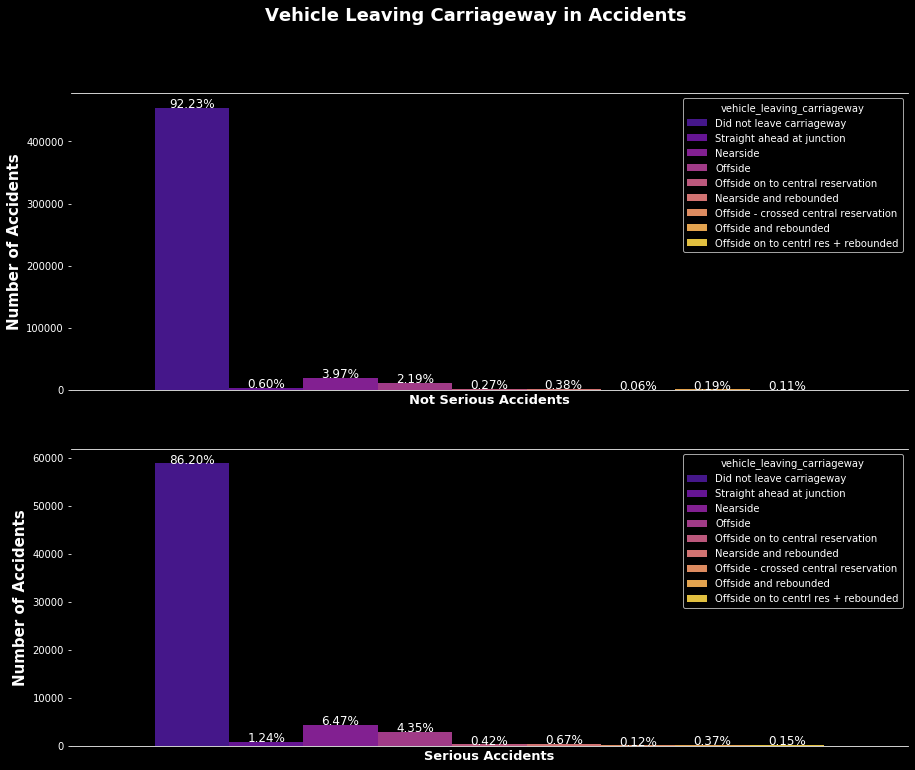

In [24]:
vlc_order=["Did not leave carriageway", "Straight ahead at junction", "Nearside", 
           "Offside", "Offside on to central reservation", "Nearside and rebounded", 
           "Offside - crossed central reservation", "Offside and rebounded", 
           "Offside on to centrl res + rebounded"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="vehicle_leaving_carriageway", hue_order=vlc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_leaving_carriageway", hue_order=vlc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Vehicle Leaving Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.savefig('vehicle_leaving_carriageway.png')
fig.show()



#### Sex of Driver vs Seriousness
The below graphs show the sex of the drivers in the accidents.

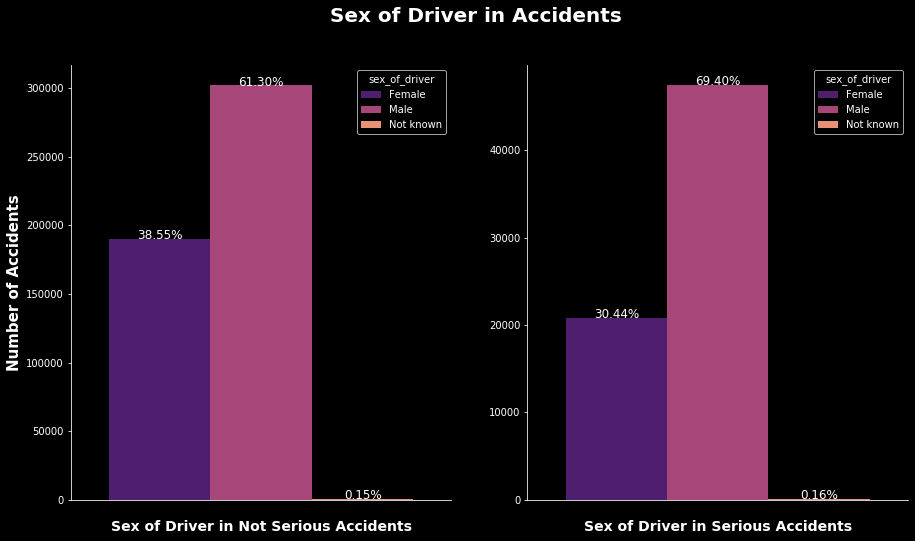

In [25]:
sod_order=["Female", "Male", "Not known"]

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="sex_of_driver", hue_order=sod_order,
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="sex_of_driver", hue_order=sod_order,
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Sex of Driver in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nSex of Driver in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nSex of Driver in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('sex_of_driver.png')
fig.show()


#### Vehicle Type vs Seriousness

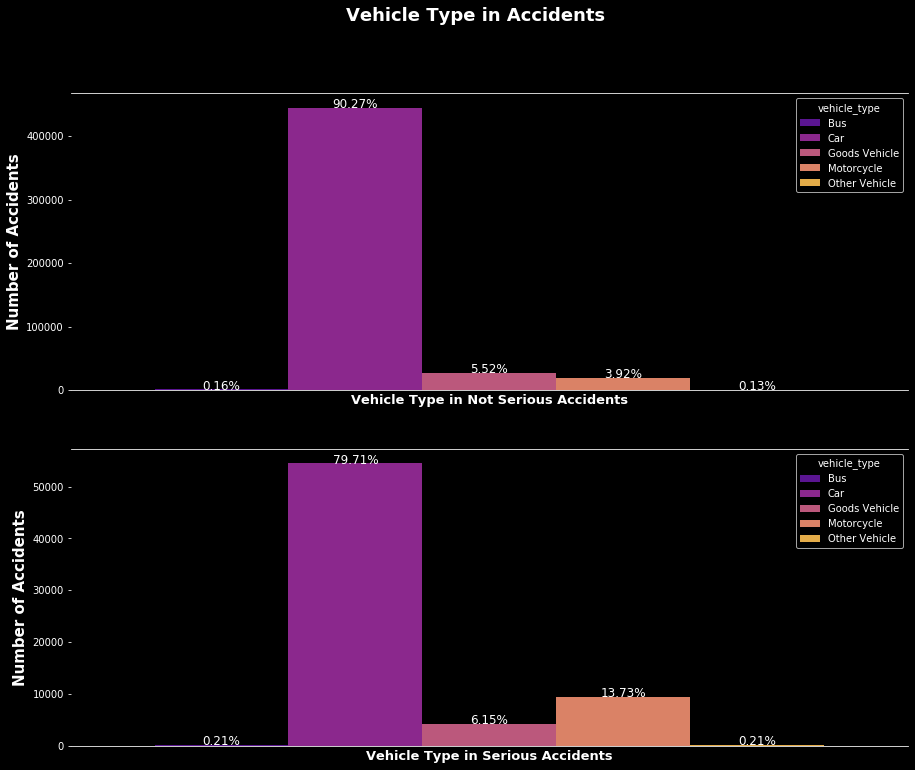

In [26]:
vt_order=['Bus', 'Car', 'Goods Vehicle', 'Motorcycle', 'Other Vehicle']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Vehicle Type in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Vehicle Type in Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Vehicle Type in Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.savefig('vehicle_type.png')
fig.show()

#### Vehicle Manoeuvres

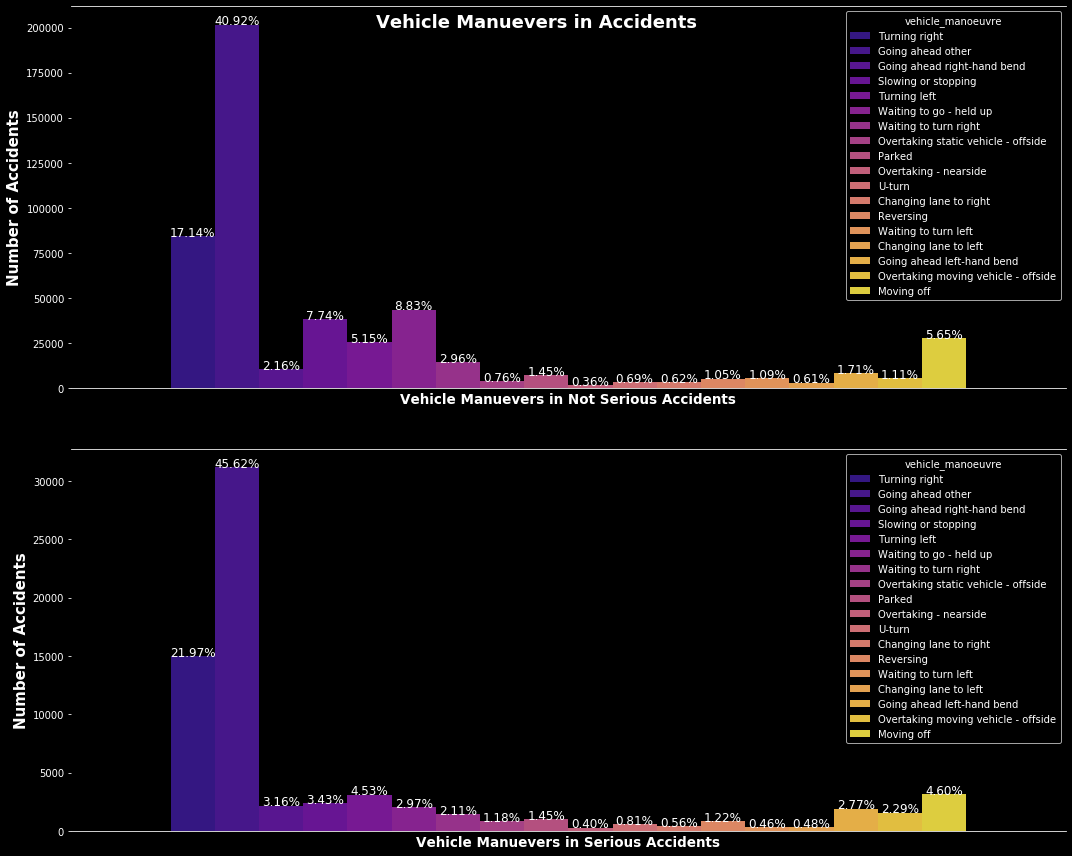

In [27]:
vm_order=['Turning right', 'Going ahead other', 'Going ahead right-hand bend',
          'Slowing or stopping', 'Turning left', 'Waiting to go - held up',
          'Waiting to turn right', 'Overtaking static vehicle - offside' ,
          'Parked', 'Overtaking - nearside', 'U-turn', 'Changing lane to right', 
          'Reversing', 'Waiting to turn left', 'Changing lane to left',
          'Going ahead left-hand bend', 'Overtaking moving vehicle - offside', 'Moving off']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="vehicle_manoeuvre",hue_order=vm_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_manoeuvre",hue_order=vm_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Vehicle Manuevers in Accidents", fontsize=18, fontweight="bold")

ax1.set_xlabel('Vehicle Manuevers in Not Serious Accidents\n\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Vehicle Manuevers in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.tight_layout() # No overlap of subplots

plt.savefig('vehicle_manoeuvre.png')
fig.show()

#### Driver Home Type Area

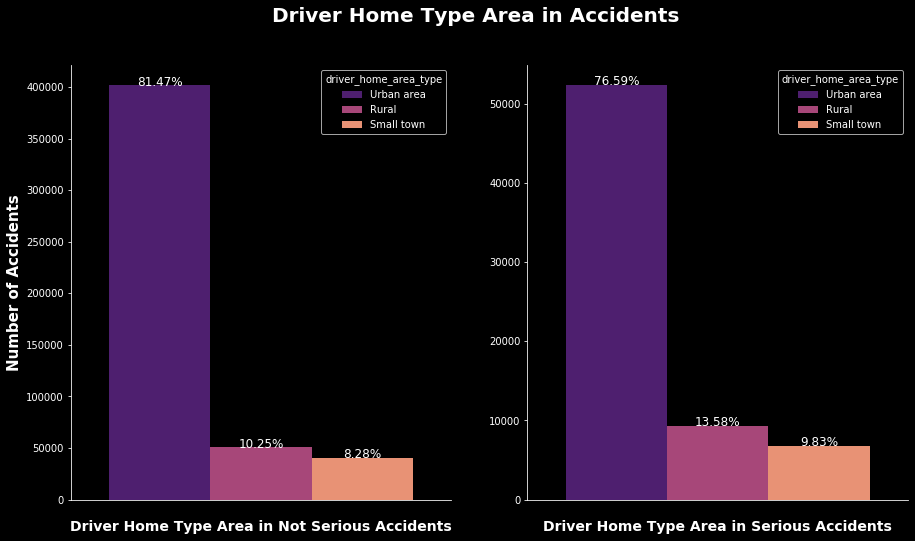

In [55]:
dhoa_order=['Urban area', 'Rural', 'Small town']

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="driver_home_area_type", hue_order=dhoa_order,
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="driver_home_area_type", hue_order=dhoa_order,
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Driver Home Type Area in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nDriver Home Type Area in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nDriver Home Type Area in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('driver_home_area.png')
fig.show()


#### Age Band of Driver

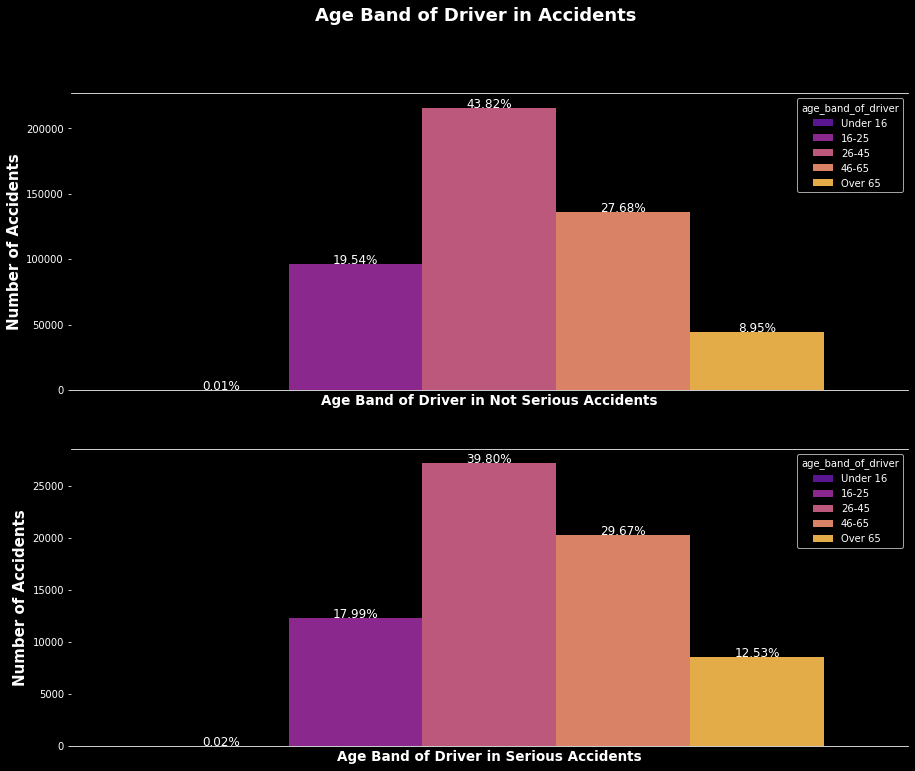

In [29]:
#age_band_of_driver
abod_order=['Under 16', '16-25', '26-45', '46-65','Over 65']


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="age_band_of_driver", hue_order=abod_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="age_band_of_driver", hue_order=abod_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Age Band of Driver in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Age Band of Driver in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Age Band of Driver in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('age_band_of_driver.png')
fig.show()


#### Junction Control

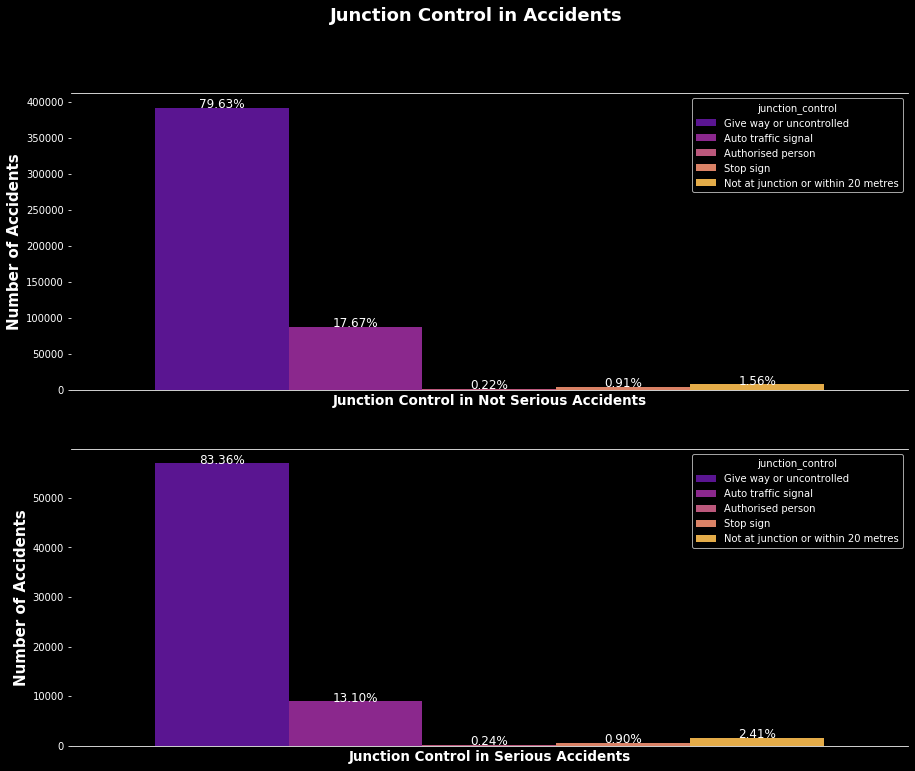

In [30]:
jc_order = ['Give way or uncontrolled', 'Auto traffic signal', 'Authorised person',
            'Stop sign','Not at junction or within 20 metres']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="junction_control", hue_order=jc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="junction_control", hue_order=jc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Junction Control in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Junction Control in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Junction Control in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('junction_control.png')
fig.show()


#### Hit Object Off Carriageway


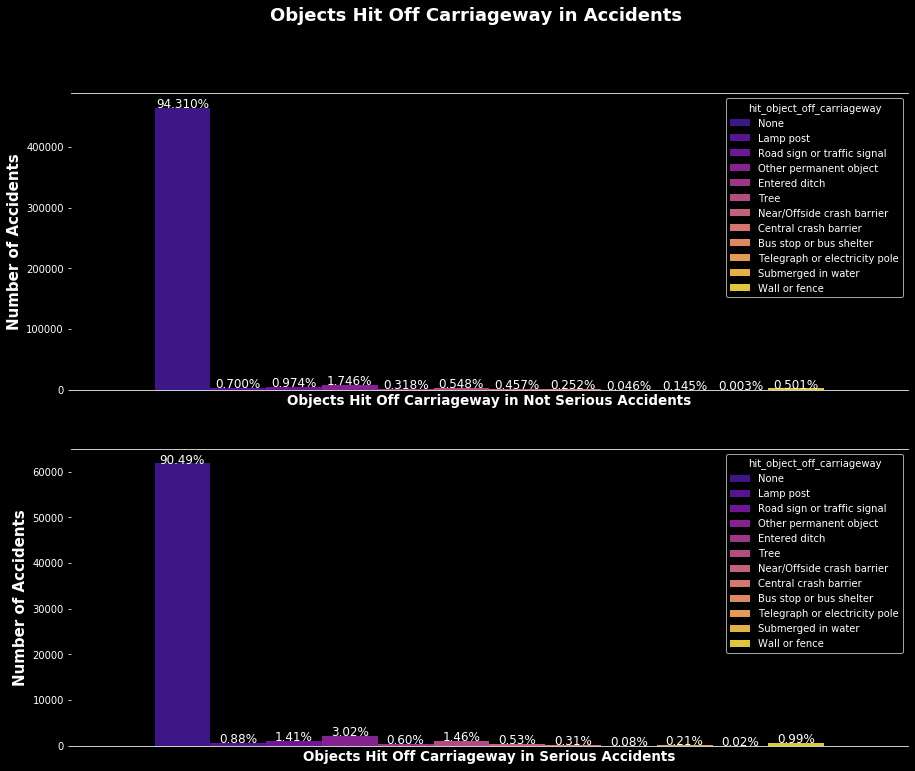

In [31]:
hooffc_order=['None', 'Lamp post', 'Road sign or traffic signal', 'Other permanent object',
              'Entered ditch', 'Tree', 'Near/Offside crash barrier','Central crash barrier',
              'Bus stop or bus shelter', 'Telegraph or electricity pole', 'Submerged in water',
              'Wall or fence']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="hit_object_off_carriageway", hue_order=hooffc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="hit_object_off_carriageway", hue_order=hooffc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Objects Hit Off Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Objects Hit Off Carriageway in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Objects Hit Off Carriageway in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('hit_object_off_carriageway.png')
fig.show()


#### Hit Object In Carriageway

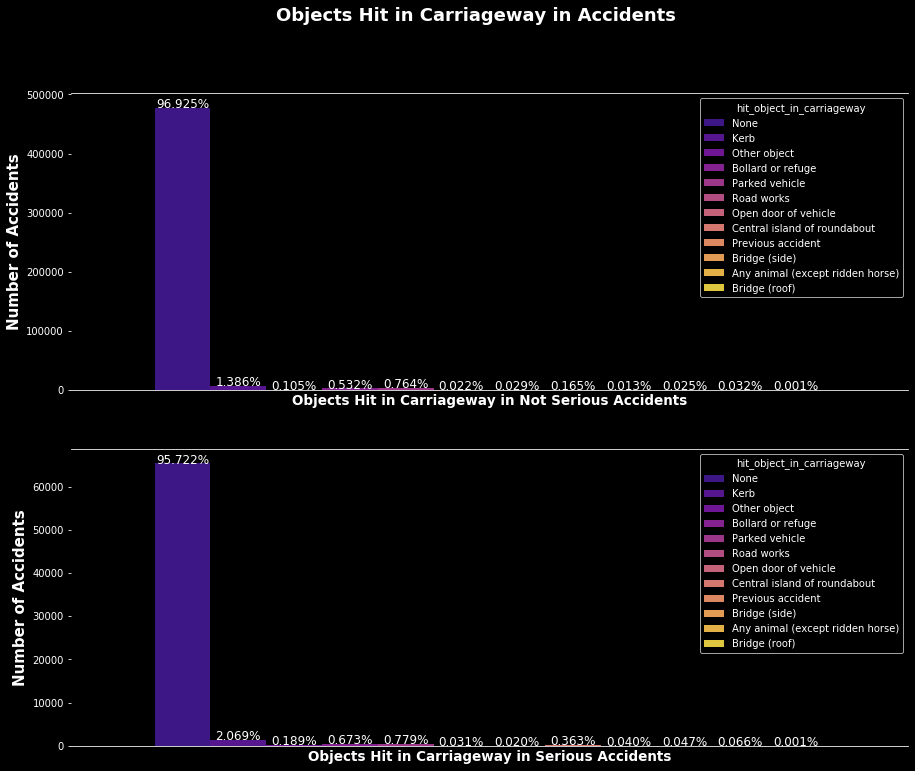

In [32]:
hoinc_order=['None', 'Kerb', 'Other object', 'Bollard or refuge', 'Parked vehicle',
             'Road works', 'Open door of vehicle', 'Central island of roundabout',
             'Previous accident', 'Bridge (side)', 'Any animal (except ridden horse)',
             'Bridge (roof)']


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="hit_object_in_carriageway", hue_order=hoinc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="hit_object_in_carriageway", hue_order=hoinc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Objects Hit in Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Objects Hit in Carriageway in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Objects Hit in Carriageway in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('hit_object_in_carriageway.png')
fig.show()


#### Driver IMD Decile

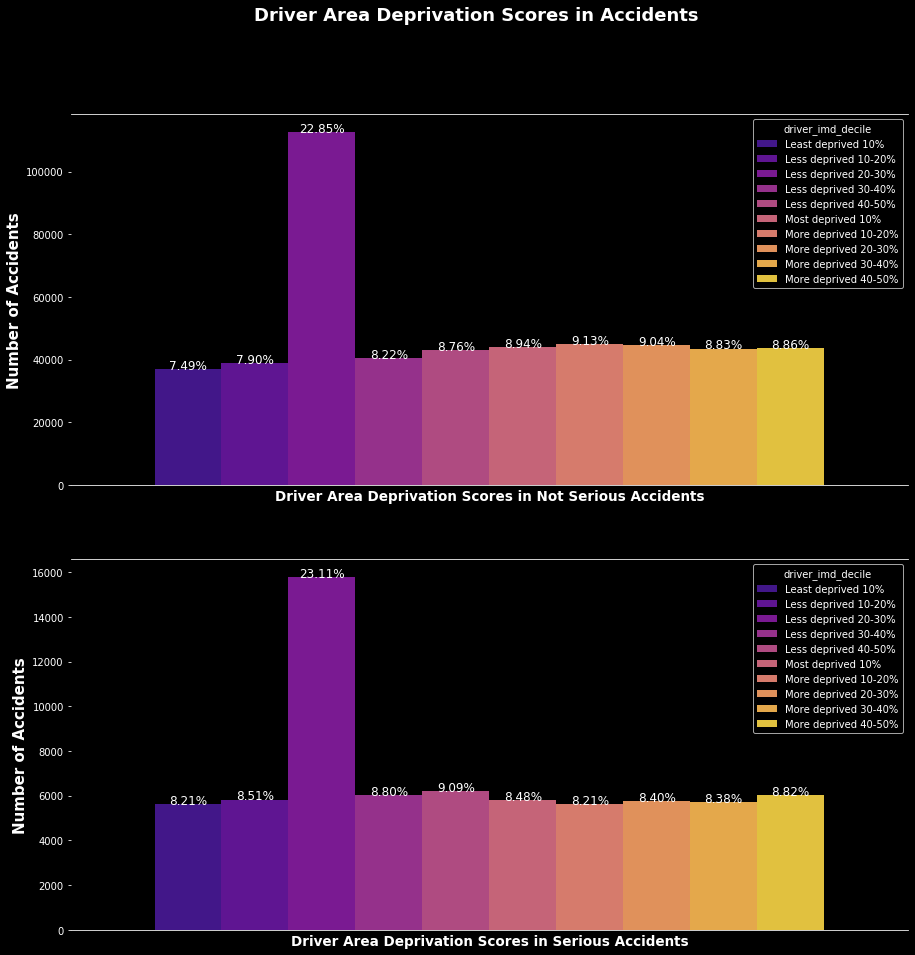

In [33]:
imd_order=["Least deprived 10%", "Less deprived 10-20%", "Less deprived 20-30%", 
           "Less deprived 30-40%","Less deprived 40-50%","Most deprived 10%",
           "More deprived 10-20%", "More deprived 20-30%", "More deprived 30-40%",
           "More deprived 40-50%"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="driver_imd_decile", hue_order=imd_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="driver_imd_decile", hue_order=imd_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Driver Area Deprivation Scores in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Driver Area Deprivation Scores in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Driver Area Deprivation Scores in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('driver_imd_decile.png')
fig.show()

#### Junction Detail

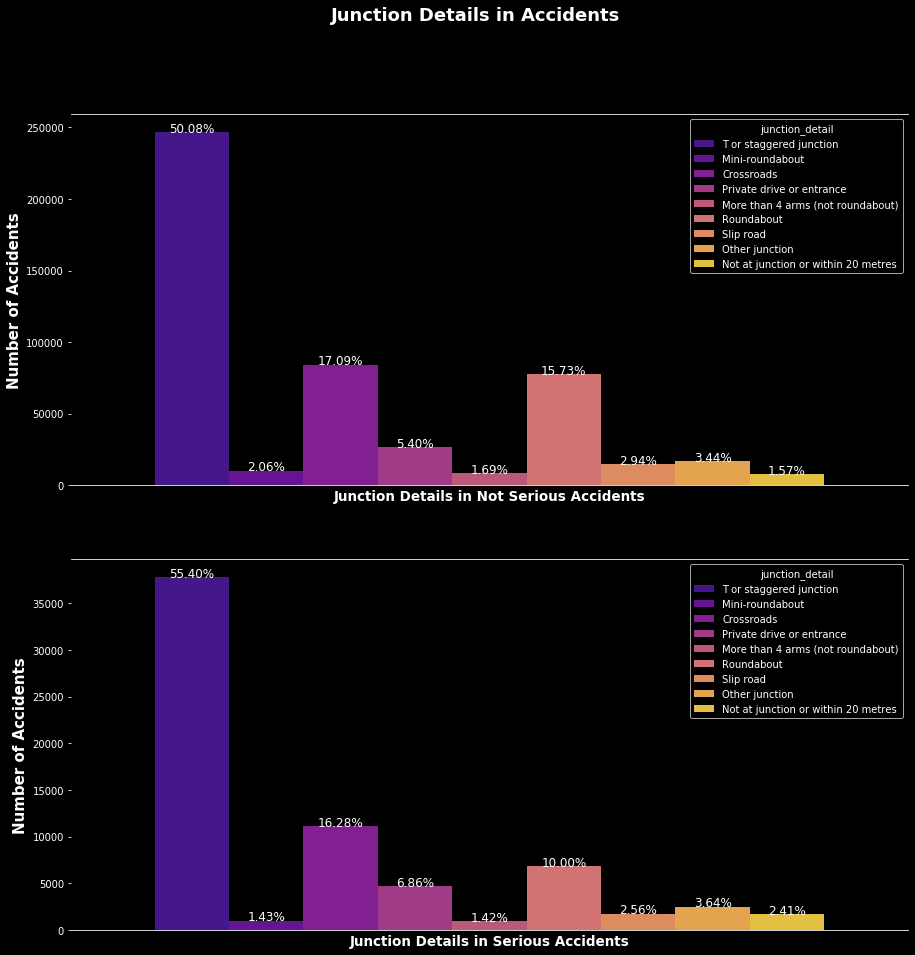

In [34]:
jud_order=['T or staggered junction', 'Mini-roundabout', 'Crossroads',
           'Private drive or entrance', 'More than 4 arms (not roundabout)',
           'Roundabout', 'Slip road', 'Other junction','Not at junction or within 20 metres']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="junction_detail", hue_order=jud_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="junction_detail", hue_order=jud_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Junction Details in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Junction Details in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Junction Details in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('junction_detail.png')
fig.show()


#### Junction Location

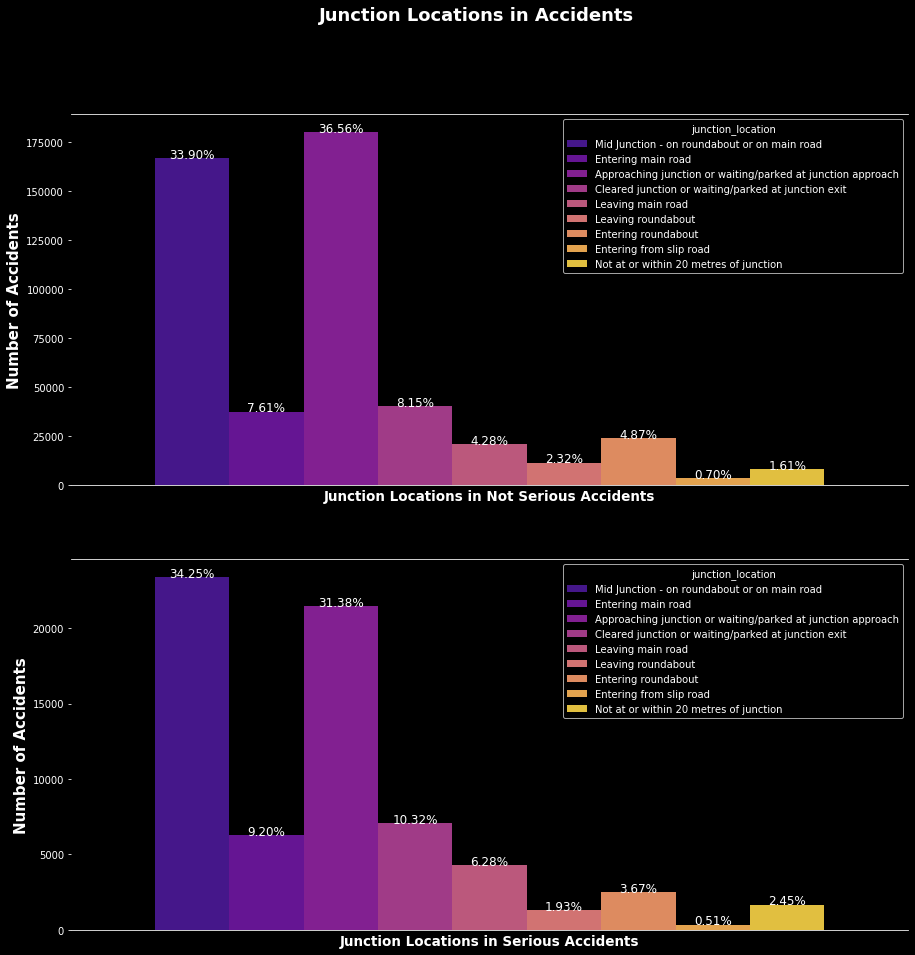

In [35]:
jul_order=['Mid Junction - on roundabout or on main road', 'Entering main road',
           'Approaching junction or waiting/parked at junction approach',
           'Cleared junction or waiting/parked at junction exit', 'Leaving main road',
           'Leaving roundabout', 'Entering roundabout', 'Entering from slip road',
           'Not at or within 20 metres of junction']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="junction_location", hue_order=jul_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="junction_location", hue_order=jul_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Junction Locations in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Junction Locations in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Junction Locations in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('junction_location.png')
fig.show()


#### Propulsion Code

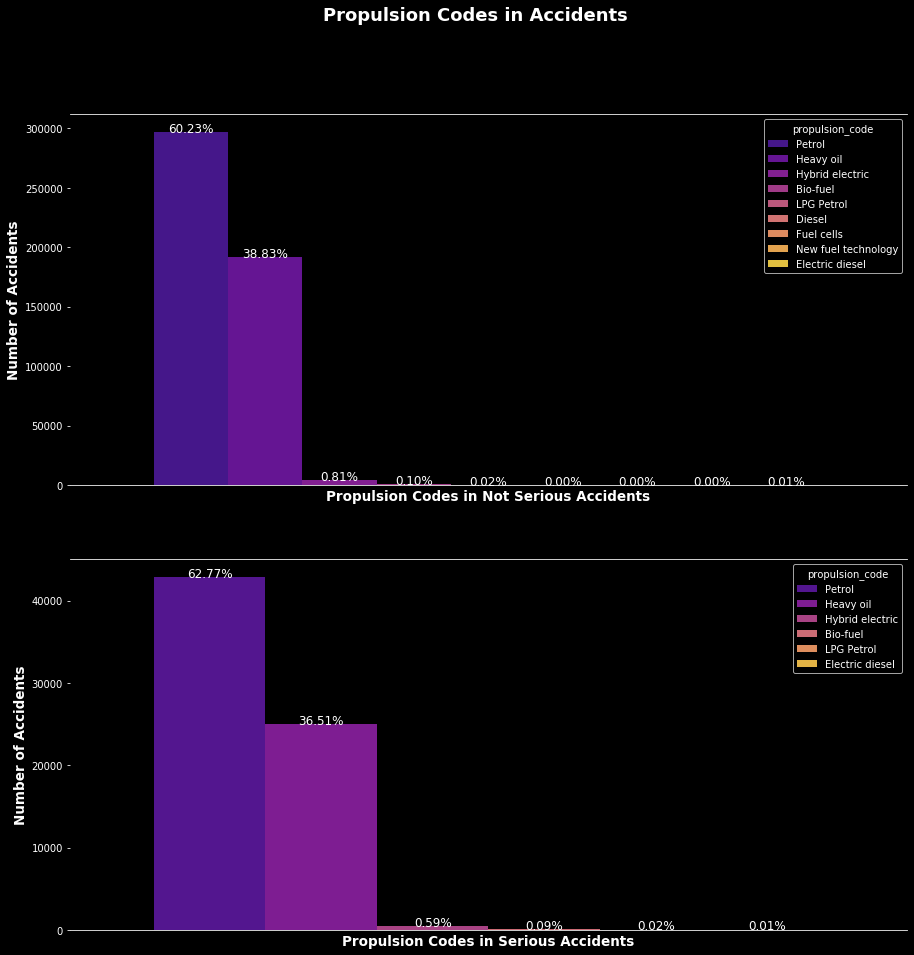

In [36]:
pd_order=['Petrol', 'Heavy oil', 'Hybrid electric', 'Bio-fuel', 'LPG Petrol', 'Diesel',
          'Fuel cells', 'New fuel technology', 'Electric diesel']
pd_order2=['Petrol', 'Heavy oil', 'Hybrid electric', 'Bio-fuel', 'LPG Petrol', 'Electric diesel']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="propulsion_code", hue_order=pd_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="propulsion_code", hue_order=pd_order2,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Propulsion Codes in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Propulsion Codes in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Propulsion Codes in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('propulsion_code.png')
fig.show()


#### Year

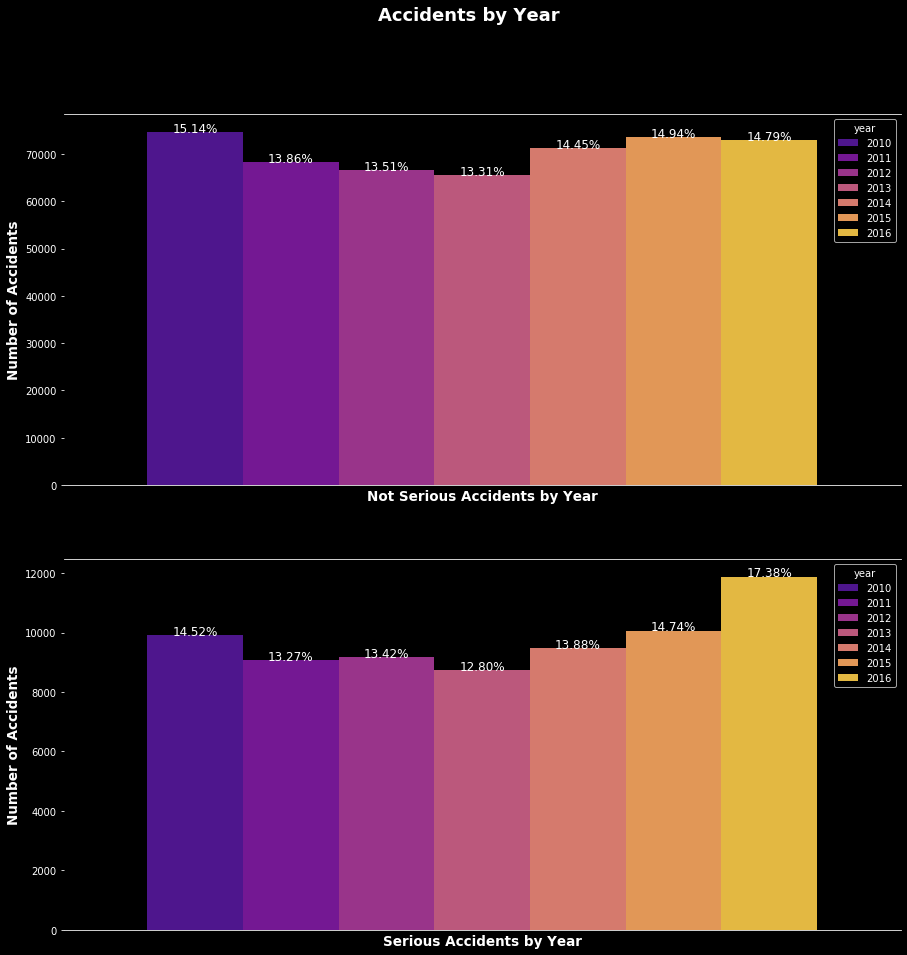

In [37]:
year_order=[2010, 2011, 2012, 2013, 2014, 2015, 2016]


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="year", hue_order=year_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="year", hue_order=year_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Accidents by Year", fontsize=18, fontweight="bold")
ax1.set_xlabel('Not Serious Accidents by Year\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Serious Accidents by Year', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('year.png')
fig.show()


### Visualization Summary
* <b>did_police_officer_attend_scene_of_accident:</b> Police attended most accidents but were less likely to NOT be called in serious accidents.
* <b>x1st_point_of_impact:</b> Majority of accidents were front impacted as the first point of impact. Not serious accidents had a higher percentage of Back impact accidents than serious accidents. Serious accidents had higher percentages of Offside and Nearside accidents. 
* <b>number_of_vehicles:</b>  Nothing significant.
* <b>speed_limit:</b> Majority of accidents occurred in 30 speed limit zones. It would have been beneficial to have actual data on the speeds of the vehicles involved or at least if they were speeding.
* <b>urban_or_rural_area:</b> Rural areas had a higher percentage of serious accidents. This may relate to hospital locations or emergency vehicle arrival data which was not available.
* <b>skidding_and_overturning:</b> Higher percentages of serious accidents involved skidding, jackknifing or overturning.
* <b>vehicle_leaving_carriageway:</b> Most vehicles did not leave the carriageway in either type of accident, however serious accidents had higher percentages of those that did leave the carriageway.
* <b>sex_of_driver:</b> Men were more involved in both serious and not serious accidents, however according to racfoundation.org, there are only 355 of female privately registered cars on UK roads.
* <b>vehicle_type:</b>  Motorcycles were involved in a significantly higher percentage of serious accidents than not serious accidents
* <b>vehicle_manoeuvre:</b> Nothing significant.                      
* <b>driver_home_area_type:</b> Rural and Small Towns has higher percentages of serious accidents. This may relate to hospital locations or emergency vehicle arrival data which was not available.
* <b>age_band_of_driver:</b> The age bands over the age of 25 had a higher percentage of serious accidents than not serious.
* <b>junction_control:</b>  Most areas with accidents were uncontrolled. 
* <b>hit_object_off_carriageway:</b> The majority of accidents did not involve objects being hit off the carriageway, however serious accidents had higher percentages of accidents that did involve hitting an object off the carriageway.
* <b>hit_object_in_carriageway:</b> Most accidents did not involve objects being hit in the carriageway; however serious accidents had higher percentages of accidents that did involve hitting an object off the carriageway.
* <b>driver_imd_decile:</b> Nothing significant. Most accidents occurred in areas that were Less deprived 20-30%
* <b>junction_detail:</b> T or staggered junctions were where most of the accidents occurred.
* <b>junction_location:</b> Nothing that separates the two serious types. However, most accidents seem to have occurred in Mid Junction - on roundabout or on main road or situations where the driver was approaching junction or waiting/parked at junction approach.
* <b>propulsion_code:</b> Diesel, Fuel cells, New fuel technology, vehicles were not recorded as a part of serious accidents.
* <b>year:</b> There has been a spike in percentage of serious accidents over the years. However, the percentage of not serious accidents has remained somewhat consistent

### Other Visualizations

Due to the previous visualizations a comparison of certain variables was desired to see more correlations.


#### Junction Control by Junction Detail

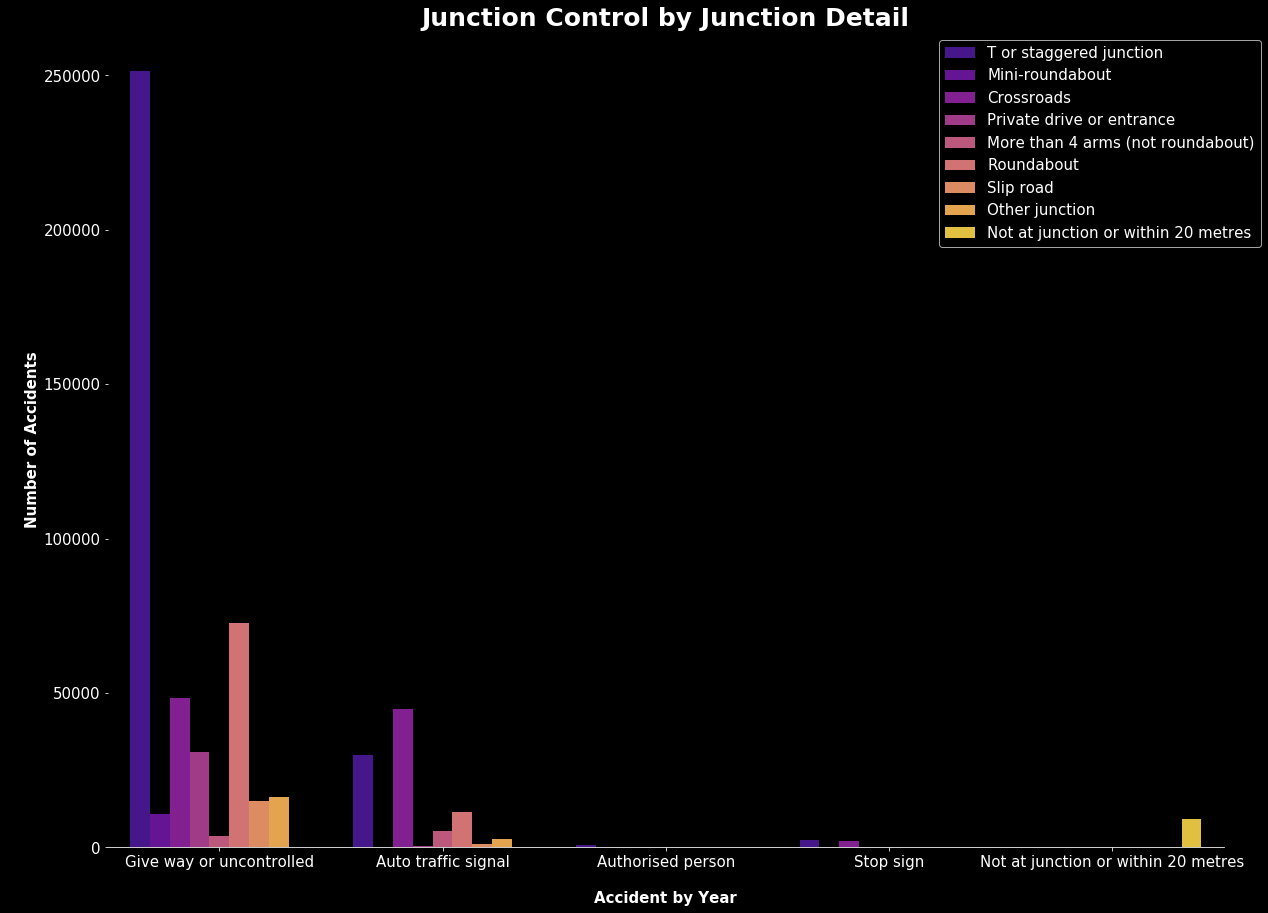

In [38]:
#Not Serious Accident
plt.figure(figsize=(20,15))
ax=sns.countplot("junction_control", hue="junction_detail",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("Junction Control by Junction Detail",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('junction_control_by_junction_detail.png')
plt.show()


#### Junction Control by Junction Location

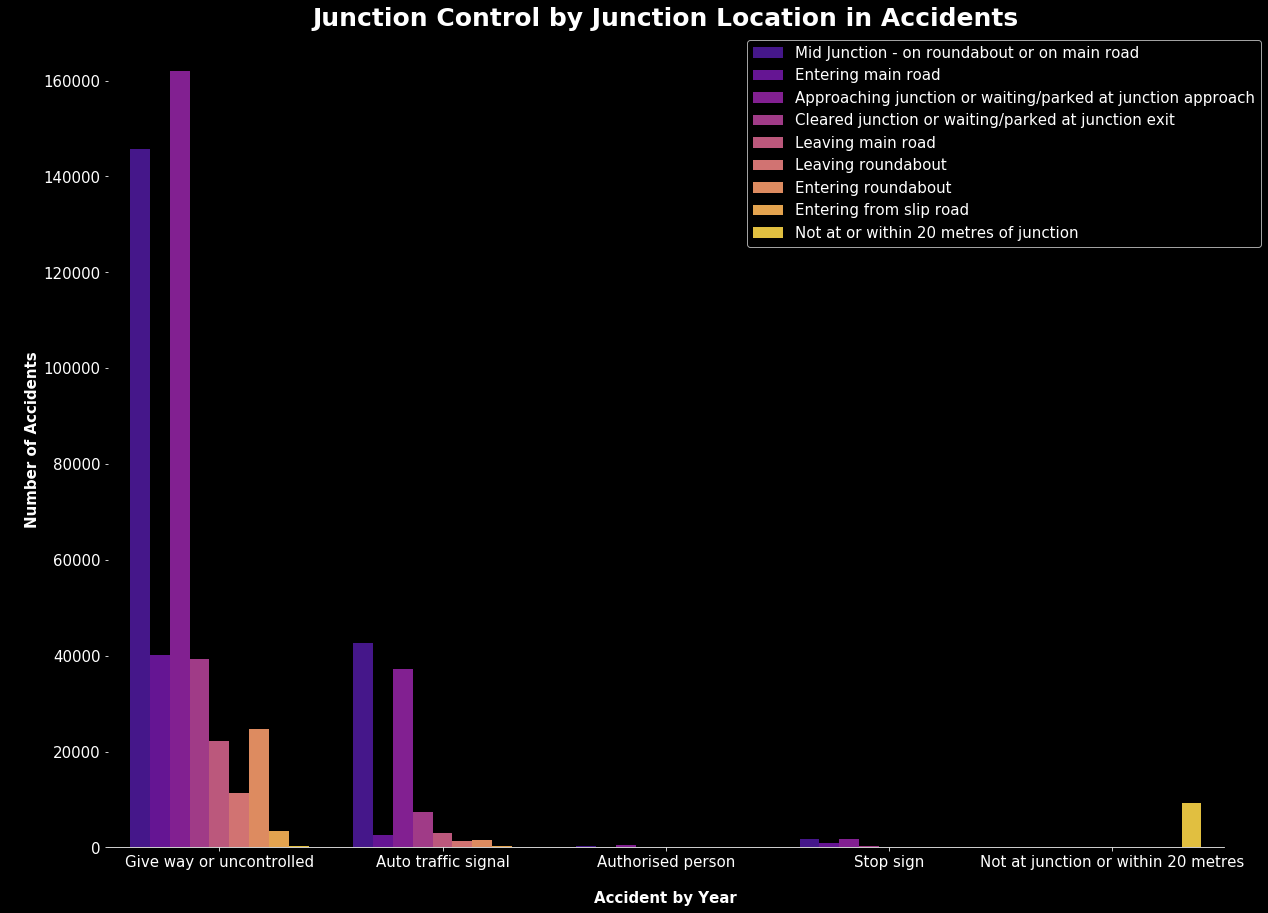

In [39]:

plt.figure(figsize=(20,15))
ax=sns.countplot("junction_control", hue="junction_location",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("Junction Control by Junction Location in Accidents",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('junction_control_by_junction_location.png')
plt.show()

#### First point of Impact by Junction Detail

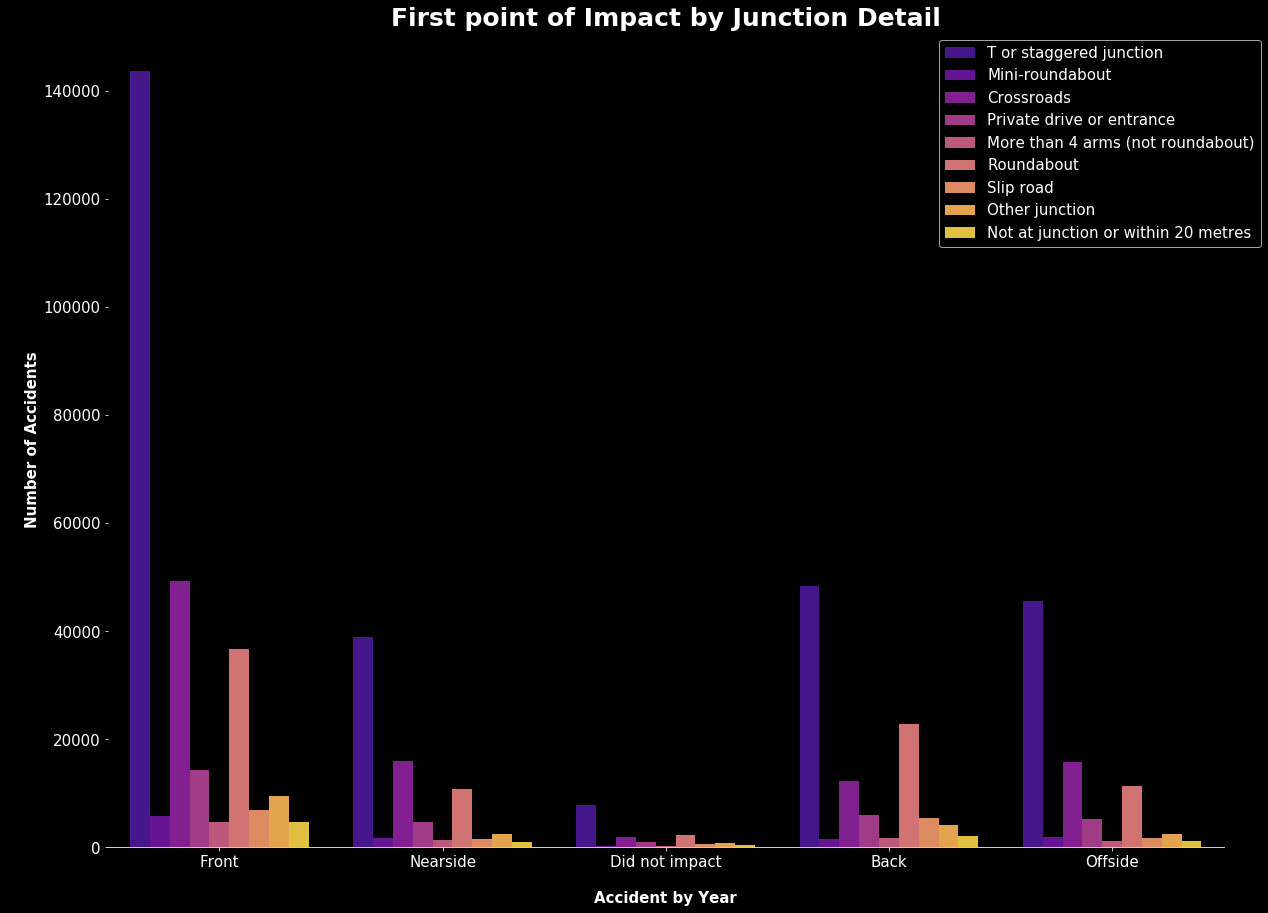

In [40]:
plt.figure(figsize=(20,15))
ax=sns.countplot("x1st_point_of_impact", hue="junction_detail",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("First point of Impact by Junction Detail",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('x1st_point_of_impact_by_junction_detail.png')
plt.show()

#### First point of Impact by Junction Location

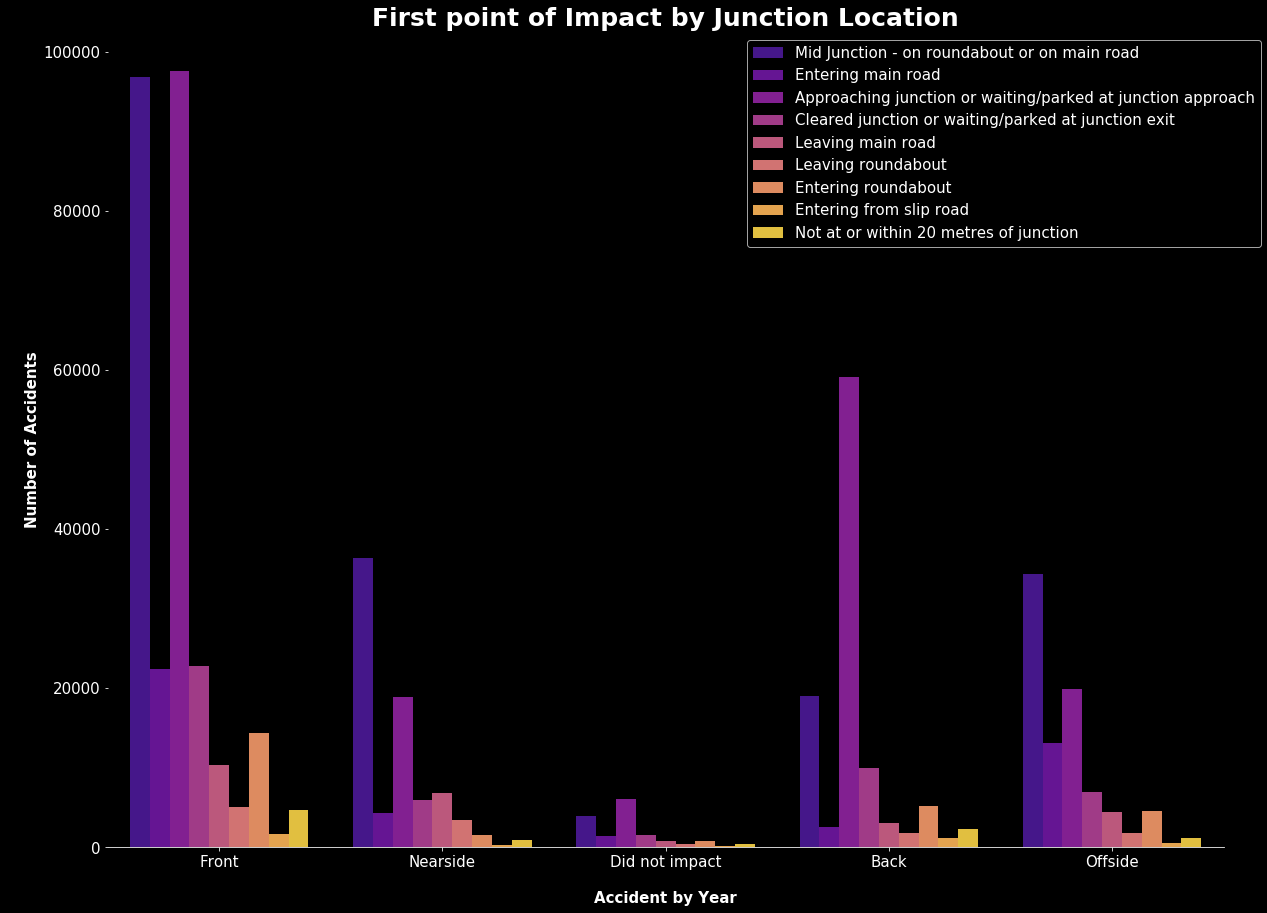

In [41]:
plt.figure(figsize=(20,15))
ax=sns.countplot("x1st_point_of_impact", hue="junction_location",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("First point of Impact by Junction Location",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('x1st_point_of_impact_by_junction_location.png')
plt.show()

#### Junction Control and First Point of Impact

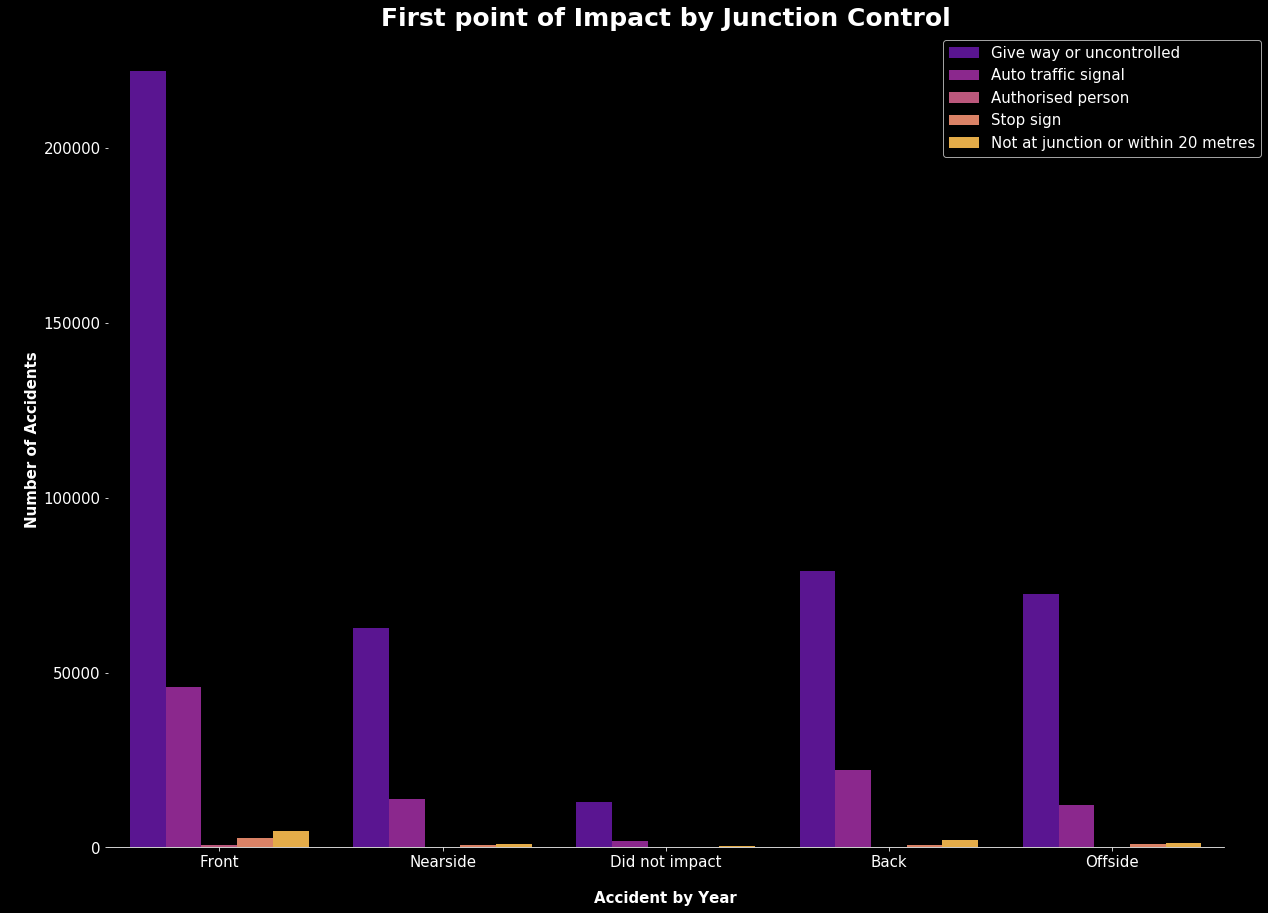

In [42]:
plt.figure(figsize=(20,15))
ax=sns.countplot("x1st_point_of_impact", hue="junction_control",
              palette="plasma", data=df)

plt.style.use('dark_background')
plt.title("First point of Impact by Junction Control",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Year", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('x1st_point_of_impact_by_junction_control.png')
plt.show()

### Other Visualizations Summary
No matter the situation above, the most accidents were involving areas that were uncontrolled. One of the main ones were the junction Detail T or staggered junction.

Other areas of concern include Mid Junctions on roundabouts or main roads and areas approaching a junction were cars were either parking or waiting in the junction. 


### Solution

From the data above more controlled areas would be benefical. Maybe signs alerting drivers of the upcoming junctions, traffic lights, or stop signs would help in some of these areas where they are feasible. 

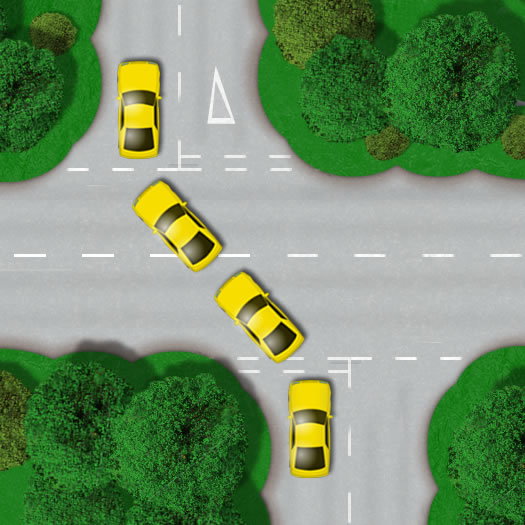

For example, this is a staggered junction, the main junction detail in accidents. One can understand how a situation such as these can lead to numerous accidents especially if proper signage is not available. Perhaps traffic lights, stop signs, or warnings indicating that they are approaching certain junctions would help reduce accidents.

#### Web Scraping
Below you wll find a web scrape of the website, [Learner Driving Centres](https://www.learnerdriving.com/learn-to-drive/highway-code/road-signs), which contains information on road signs in the UK. They were pulled to show examples of signage available to be placed. 

In [43]:
#request website
r = requests.get('https://www.learnerdriving.com/learn-to-drive/highway-code/road-signs')

#parse HTML
soup = BeautifulSoup(r.text, 'html.parser')

#filter results
results = soup.find_all('div', attrs={'class':'fifth'})

In [44]:
#done to find specific results area
first_result=results[0]
first_result
first_result.find('img')['src']

'/images/highway-code/entry-to-20-mph-zone.png'

In [45]:
#get images of signs and sign descriptions 
signage = []
for result in results:
    sign=result.find('img')['src']
    sign_desc=result.contents[1]
    signage.append((sign, sign_desc))

In [46]:
#put pulled UK Traffic Signs into dataframe
uktrafficsigns = pd.DataFrame(signage, columns=['Sign', 'Sign Description'])
uktrafficsigns.head()

Sign  \
0      /images/highway-code/entry-to-20-mph-zone.png   
1        /images/highway-code/end-of-20-mph-zone.png   
2             /images/highway-code/maximum-speed.png   
3  /images/highway-code/national-speed-limit-appl...   
4    /images/highway-code/school-crossing-patrol.png   

               Sign Description  
0          Entry to 20 mph zone  
1            End of 20 mph zone  
2                 Maximum speed  
3  National speed limit applies  
4        School crossing patrol

In [47]:
'''
the "image" is just part of the image link, 
must parse the first half in order to have full image link

'''
uktrafficsigns['Sign'] = 'https://www.learnerdriving.com/'+uktrafficsigns['Sign'] 
uktrafficsigns.head()

Sign  \
0  https://www.learnerdriving.com//images/highway...   
1  https://www.learnerdriving.com//images/highway...   
2  https://www.learnerdriving.com//images/highway...   
3  https://www.learnerdriving.com//images/highway...   
4  https://www.learnerdriving.com//images/highway...   

               Sign Description  
0          Entry to 20 mph zone  
1            End of 20 mph zone  
2                 Maximum speed  
3  National speed limit applies  
4        School crossing patrol

In [48]:
'''
In some coding below I saw that one of the fields was blank (at index 42) but was not reading as null.
In order to fix that I changed the "Sign Description" and decided to place it here.
'''
uktrafficsigns.at[42,'Sign Description']="T-junction with priority over vehicles from the right"

In [49]:
#I wanted to save this as a csv for later, and to stop unnecessary web scraping
uktrafficsigns.to_csv('uktrafficsigns.csv', header=False, index=False) 

In [50]:
#I wanted the html to show up as images instead of links
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', -1)
ukts=HTML(uktrafficsigns.to_html(escape=False ,formatters=dict(Sign=path_to_image_html)))
HTML(uktrafficsigns.to_html(escape=False ,formatters=dict(Sign=path_to_image_html)))

In [51]:
'''
Here I am creating a df that will allow me to pull all junction signs.
"ction" was used instead of "junction" in order to pull all variables.
'''
junction =uktrafficsigns[uktrafficsigns['Sign Description'].str.contains("nction", regex=False)]

#Making it its own HTML object (same as above)

def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', -1)

HTML(junction.to_html(escape=False ,formatters=dict(Sign=path_to_image_html)))


In [52]:
#Repeated the above steps for giveways
give=uktrafficsigns[uktrafficsigns['Sign Description'].str.contains("ive ", regex=False)]
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', -1)

HTML(give.to_html(escape=False ,formatters=dict(Sign=path_to_image_html)))

In [53]:
#roundabouts
roundabout=uktrafficsigns[uktrafficsigns['Sign Description'].str.contains("ounda", regex=False)]

def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', -1)

HTML(roundabout.to_html(escape=False ,formatters=dict(Sign=path_to_image_html)))

#### Mapping of Problem Areas
Below we used Tableau to map what could be deemed problem areas for the UK. These are accidents in areas with high deprivation (driver_imd_decile @ more deprived 40-50%)  and no signange at T or staggered junctions.<br>

In [54]:
%%HTML

<div class='tableauPlaceholder' id='viz1572177057382' style='position: relative'><noscript><a href='https:&#47;&#47;github.com&#47;GenTaylor&#47;Traffic-Accident-Analysis'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ac&#47;AccidentForecasting&#47;SeriousAccidentsinAreaswithHighDeprivationandNoSignage&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AccidentForecasting&#47;SeriousAccidentsinAreaswithHighDeprivationandNoSignage' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ac&#47;AccidentForecasting&#47;SeriousAccidentsinAreaswithHighDeprivationandNoSignage&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1572177057382');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Genesis L. Taylor<br>
[Github](https://github.com/GenTaylor/) | [Linkedin](https://linkedin.com/in/genesistaylor/) | [Tableau](https://public.tableau.com/profile/genesis.taylor#!/) | [genesisltaylor@gmail.com](mailto:genesisltaylor@gmail.com)
